In [1]:
import os
import matplotlib.pyplot as plt

# Load standard libs
import sys
import pandas as pd

# Load custom code
from neuroencoders.utils.global_classes import Params, Project, save_project_to_pickle
from neuroencoders.utils.global_classes import DataHelper as DataHelperClass
from neuroencoders.importData import rawdata_parser
from neuroencoders.resultAnalysis import print_results
from neuroencoders.transformData.linearizer import UMazeLinearizer
from neuroencoders.utils import management, MOBS_Functions
from neuroencoders.fullEncoder import an_network as Training
from neuroencoders.importData.juliaData.julia_data_parser import julia_spike_filter
from neuroencoders.openEphysExport.generate_json import generate_json
import numpy as np
from importlib import reload
from neuroencoders.importData import epochs_management as ep

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
nameExp = "new_4d_GaussianHeatMap_LinearLoss"
nameExp_Transformer = "new_4d_GaussianHeatMap_LinearLoss_Transformer"
nameExp_LSTM = "current_LogLoss_Transformer_Dense_LSTM"

In [4]:
jsonPath = None
windowSizeMS = [36, 108, 252]
mode = "ann"
target = "pos"
phase = "pre"
nEpochs = 200
mouse = "1199"
manipe = "PAG"

In [5]:
from neuroencoders.utils.MOBS_Functions import path_for_experiments_df


Dir = path_for_experiments_df("Sub", nameExp)
Dir_Transformer = path_for_experiments_df("Sub", nameExp_Transformer)
Dir_LSTM = path_for_experiments_df("Sub", nameExp_LSTM)

# load results (different strides)

In [6]:
%matplotlib qt

In [7]:
mice_nb = [
    "M1199_PAG",
    "M994_PAG",
    "M1239_MFB",
    "M1230_Novel",
    "M1230_Known",
    "M1162_MFB",
]
mice_names = ["1199", "994", "1239", "1230", "1230", "1162"]
mice_manipes = ["PAG", "PAG", "MFB", "Novel", "Known", "MFB"]

In [8]:
Dir_LSTM

path       name       manipe  \
0   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1168       SubMFB   
1   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1186       SubPAG   
2   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1336       SubMFB   
3   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1336       SubMFB   
4   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1199       SubPAG   
5   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1199  SubReversal   
6   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1117       SubMFB   
7   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1281       SubMFB   
8   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1182       SubPAG   
9   /media/mickey/DataTheotime210/DimaERC2/neuroen...   Mouse994       SubPAG   
10  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1239       SubMFB   
11  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1162       SubMFB   
12  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1199       SubMFB   
13  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1239       SubPAG   
14  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1162       SubPAG   
15  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1230     SubKnown   
16  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1230     SubNovel   

   CorrecAmpli Session delay  date Treatment  \
0         None    None  None  None      None   
1         None    None  None  None      None   
2         None    None  None  None      None   
3         None    None  None  None      None   
4         None    None  None  None      None   
5         None    None  None  None      None   
6         None    None  None  None      None   
7         None    None  None  None      None   
8         None    None  None  None      None   
9         None    None  None  None      None   
10        None    None  None  None      None   
11        None    None  None  None      None   
12        None    None  None  None      None   
13        None    None  None  None      None   
14        None    None  None  None      None   
15        None    None  None  None      None   
16        None    None  None  None      None   

                                            expe_info  \
0   [[[[[1168]], ['SL'], ['20210121'], ['StimMFBWa...   
1   [[[[[1186]], ['DB'], ['20210409'], ['UMazePAG'...   
2   [[[[[1336]], ['SL'], ['20220711'], ['StimMFBWa...   
3   [[[[[1336]], ['SL'], ['20220711'], ['StimMFBWa...   
4   [[[[[1199]], ['DB'], ['20210408'], ['UMaze'], ...   
5   [[[[[1199]], ['SL'], ['20210416'], ['Reversal'...   
6   [[[[[1117]], ['SL'], ['20201110'], ['StimMFBWa...   
7   [[[[[1281]], ['SL'], ['20220530'], ['StimMFBWa...   
8   [[[[[1182]], ['DB'], ['20210301'], ['UMaze'], ...   
9   [[[[[994]], ['DB'], ['20191013'], ['UMaze'], [...   
10  [[[[[1239]], ['SL'], ['20211105'], ['StimMFBWa...   
11  [[[[[1162]], ['SL'], ['20200119'], ['StimMFBWa...   
12  [[[[[1199]], ['SL'], ['20210410'], ['StimMFBWa...   
13  [[[[[1239]], ['DB'], ['20211110'], ['UMazePAG'...   
14  [[[[[1162]], ['DB'], ['20210121'], ['UMaze'], ...   
15  [[[[[1230]], ['DB'], ['20211012'], ['UMazeKnow...   
16  [[[[[1230]], ['AB'], ['20210826'], ['Novel'], ...   

                                              results  \
0   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
1   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
2   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
3   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
4   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
5   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
6   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
7   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
8   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
9   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
10  /media/mickey/DataTheotime210/DimaERC2/neuroen...   
11  /media/mic

In [9]:
%matplotlib inline

In [10]:
windowSizeMS

[36, 108, 252]

In [11]:
from neuroencoders.utils.MOBS_Functions import Results_Loader, Mouse_Results

In [12]:
mice_manipes

['PAG', 'PAG', 'MFB', 'Novel', 'Known', 'MFB']

In [13]:
loader_stride1_4 = Results_Loader.from_pickle(
    "/home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/STRIDE1_and_4_NOPREDLOSS_results_all.pickle"
)

I0000 00:00:1758395090.457518  112559 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11081 MB memory:  -> device: 0, name: NVIDIA RTX 2000 Ada Generation, pci bus id: 0000:ac:00.0, compute capability: 8.9


Results_Loader object loaded from /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/STRIDE1_and_4_NOPREDLOSS_results_all.pickle


In [14]:
loader_stride2 = Results_Loader.from_pickle(
    "/home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/stride2_4d_NOPREDLOSS_results_all.pickle"
)

Results_Loader object loaded from /home/mickey/Documents/Theotime/DimaERC2/neuroencoders_1021/_work/stride2_4d_NOPREDLOSS_results_all.pickle


In [15]:
loader_all = loader_stride1_4 + loader_stride2  # + loader_stride2

In [16]:
loader_all


Results_Loader Object

NameExp                                                | Names      | Phases   | TimeWindows
--------------------------------------------------------------------------------------------
new_4d_GaussianHeatMap_LinearLoss_Transformer          | M1199PAG   | cond     | 108        
STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer | M994PAG    | training | 252        
STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Transformer | M1239MFB   | pre      | 36         
                                                       | M1230Novel | post     |            
                                                       | M1230Known |          |            
                                                       | M1162MFB   |          |            
                                                       | M1199PAG   |          |            
                                                       | M994PAG    |          |            
                                              

In [17]:
# check if nameExp contains "LSTM" or "Transformer" to set the ann_mode row by row
loader_all.results_df["ann_mode"] = "Transformer"
loader_all.results_df.loc[
    loader_all.results_df["nameExp"].str.contains("LSTM"), "ann_mode"
] = "LSTM"

In [18]:
loader_all.results_df.sort_values(by=["ann_mode", "mouse", "phase"], inplace=True)

In [19]:
loader_all.results_df.keys()

Index(['nameExp', 'mouse', 'manipe', 'phase', 'winMS', 'asymmetry_index',
       'fullTruePos_fromBehavior', 'alignedTruePos_fromBehavior',
       'fullTrueLinPos_from_behavior', 'alignedTrueLinPos_from_behavior',
       'fullTimeBehavior', 'alignedTimeBehavior', 'timeNN', 'fullSpeed',
       'alignedSpeed', 'posIndex_NN', 'speedMask', 'linPred', 'fullPred',
       'truePos', 'linTruePos', 'predLoss', 'resultsNN',
       'direction_fromBehavior', 'direction_fromNN', 'bayesPred',
       'bayesLinPred', 'bayesProba', 'results', 'mouse_name', 'ann_mode',
       'mean_speed', 'mean_error', 'lin_error', 'predLossThreshold',
       'mean_error_selected', 'lin_error_selected',
       'asymmetry_index_on_predicted', 'asymmetry_index_on_selected_predicted',
       'training_asymmetry_index', 'real_asymmetry_ratio',
       'predicted_asymmetry_ratio', 'predicted_asymmetry_ratio_on_selected',
       'predicted_asymmetry_ratio_normalized',
       'selected_predicted_asymmetry_ratio_normalized',
  

In [20]:
loader_all.apply_analysis()

Analysis already applied to the DataFrame.


nameExp mouse manipe     phase  \
0        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB      cond   
1        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB      cond   
2        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB      cond   
3    STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB      cond   
136  STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB      cond   
..                                                 ...   ...    ...       ...   
134  STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   
135  STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   
205  STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   
206  STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   
207  STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   

     winMS  asymmetry_index  \
0       36         3.160724   
1      108         3.160724   
2      252         3.160724   
3      252         3.160724   
136     36         3.160724   
..     ...              ...   
134    108         2.001375   
135    252         2.001375   
205     36         2.001375   
206    108         2.001375   
207    252         2.001375   

                              fullTruePos_fromBehavior  \
0    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
1    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
2    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
3    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
136  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
..                                                 ...   
134  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
135  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
205  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
206  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
207  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   

                           alignedTruePos_fromBehavior  \
0    [[0.26793240284576997, 0.8295787420565349], [0...   
1    [[0.26793240284576997, 0.8295787420565349], [0...   
2    [[0.26793240284576997, 0.8295787420565349], [0...   
3    [[0.26793240284576997, 0.8295787420565349], [0...   
136  [[0.5321644044431648, 0.9915833623122323], [0....   
..                                                 ...   
134  [[0.802539763175163, 0.04998183919827476], [0....   
135  [[0.802539763175163, 0.04998183919827476], [0....   
205  [[0.802539763175163, 0.04998183919827476], [0....   
206  [[0.802539763175163, 0.04998183919827476], [0....   
207  [[0.802539763175163, 0.04998183919827476], [0....   

                          fullTrueLinPos_from_behavior  \
0    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
136  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
..                                                 ...   
134  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
135  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
205  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
206  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
207  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                       alignedTrueLinPos_from_behavior  ...  \
0    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
1    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
2    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
3    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
136  [0.5212138509557749, 0.10908862861612689, 0.09...  ...   
..                                                 ...  ...   
134  [0.9863637793433644, 0.9863637793433644, 0.986...  ...   
135  [0.9863637793433644, 0.9863637793433644, 0.986...  ...   
205  [0.9863637793433644, 0.986363779343364

In [21]:
loader_all.results_df.head()

nameExp mouse manipe phase  \
0        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB  cond   
1        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB  cond   
2        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB  cond   
3    STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB  cond   
136  STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB  cond   

     winMS  asymmetry_index  \
0       36         3.160724   
1      108         3.160724   
2      252         3.160724   
3      252         3.160724   
136     36         3.160724   

                              fullTruePos_fromBehavior  \
0    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
1    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
2    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
3    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
136  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   

                           alignedTruePos_fromBehavior  \
0    [[0.26793240284576997, 0.8295787420565349], [0...   
1    [[0.26793240284576997, 0.8295787420565349], [0...   
2    [[0.26793240284576997, 0.8295787420565349], [0...   
3    [[0.26793240284576997, 0.8295787420565349], [0...   
136  [[0.5321644044431648, 0.9915833623122323], [0....   

                          fullTrueLinPos_from_behavior  \
0    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
136  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                       alignedTrueLinPos_from_behavior  ...  \
0    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
1    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
2    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
3    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
136  [0.5212138509557749, 0.10908862861612689, 0.09...  ...   

    asymmetry_index_on_predicted asymmetry_index_on_selected_predicted  \
0                       1.356432                              3.264415   
1                       1.741534                              6.008830   
2                       1.310355                              1.289394   
3                       0.848298                              0.982419   
136                     0.779506                              0.824116   

    training_asymmetry_index real_asymmetry_ratio predicted_asymmetry_ratio  \
0                   1.019774             3.099437                  1.330131   
1                   1.019774             3.099437                  1.707765   
2                   1.019774             3.099437                  1.284947   
3                   1.019774             3.099437                  0.831849   
136                 1.019774             3.099437                  0.764391   

    predicted_asymmetry_ratio_on_selected  \
0                                3.201116   
1                                5.892316   
2                                1.264392   
3                                0.963370   
136                              0.808136   

    predicted_asymmetry_ratio_normalized  \
0                               0.437638   
1                               0.561887   
2                               0.422772   
3                               0.273694   
136                             0.251499   

    selected_predicted_asymmetry_ratio_normalized  \
0                                        1.053228   
1                                        1.938685   
2                                        0.416009   
3                                        0.316967   
136                                      0.265892   

                                 true_binary_direction  \
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2    [0, 0, 0, 0, 0, 0

In [22]:
from pathlib import Path

loader_all.save(
    path=os.path.join(
        Path.home(),
        "Documents",
        "Theotime",
        "DimaERC2",
        "neuroencoders_1021",
        "_work",
        "STRIDE1_2_and_4_NOPREDLOSS_results_all.pickle",
    )
)

# start analysis

In [23]:
loader_all.results_df["stride"] = loader_all.results_df["nameExp"].apply(
    lambda x: ("4" if "STRIDE_4" in x else "2") if "STRIDE" in x else "1"
)

In [24]:
main_dir = os.path.realpath(
    "/home/mickey/Dropbox/Mobs_member/Theotime_De_Charrin/Figures/"
)

In [25]:
loader_all.results_df.head()

nameExp mouse manipe phase  \
0        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB  cond   
1        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB  cond   
2        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB  cond   
3    STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB  cond   
136  STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB  cond   

     winMS  asymmetry_index  \
0       36         3.160724   
1      108         3.160724   
2      252         3.160724   
3      252         3.160724   
136     36         3.160724   

                              fullTruePos_fromBehavior  \
0    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
1    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
2    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
3    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
136  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   

                           alignedTruePos_fromBehavior  \
0    [[0.26793240284576997, 0.8295787420565349], [0...   
1    [[0.26793240284576997, 0.8295787420565349], [0...   
2    [[0.26793240284576997, 0.8295787420565349], [0...   
3    [[0.26793240284576997, 0.8295787420565349], [0...   
136  [[0.5321644044431648, 0.9915833623122323], [0....   

                          fullTrueLinPos_from_behavior  \
0    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
136  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                       alignedTrueLinPos_from_behavior  ...  \
0    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
1    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
2    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
3    [0.36751459806271514, 0.36751459806271514, 0.3...  ...   
136  [0.5212138509557749, 0.10908862861612689, 0.09...  ...   

    asymmetry_index_on_selected_predicted training_asymmetry_index  \
0                                3.264415                 1.019774   
1                                6.008830                 1.019774   
2                                1.289394                 1.019774   
3                                0.982419                 1.019774   
136                              0.824116                 1.019774   

    real_asymmetry_ratio predicted_asymmetry_ratio  \
0               3.099437                  1.330131   
1               3.099437                  1.707765   
2               3.099437                  1.284947   
3               3.099437                  0.831849   
136             3.099437                  0.764391   

    predicted_asymmetry_ratio_on_selected  \
0                                3.201116   
1                                5.892316   
2                                1.264392   
3                                0.963370   
136                              0.808136   

    predicted_asymmetry_ratio_normalized  \
0                               0.437638   
1                               0.561887   
2                               0.422772   
3                               0.273694   
136                             0.251499   

    selected_predicted_asymmetry_ratio_normalized  \
0                                        1.053228   
1                                        1.938685   
2                                        0.416009   
3                                        0.316967   
136                                      0.265892   

                                 true_binary_direction  \
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
136  [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...   

                     

In [26]:
loader_all


Results_Loader Object

NameExp                                                | Names      | Phases   | TimeWindows
--------------------------------------------------------------------------------------------
new_4d_GaussianHeatMap_LinearLoss_Transformer          | M1199PAG   | cond     | 108        
STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer | M994PAG    | training | 252        
STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Transformer | M1239MFB   | pre      | 36         
                                                       | M1230Novel | post     |            
                                                       | M1230Known |          |            
                                                       | M1162MFB   |          |            
                                                       | M1199PAG   |          |            
                                                       | M994PAG    |          |            
                                              

In [27]:
loader_all.mean_error_matrix_linerrors_by_speed(folder=main_dir)

## save dataframe as mat struct

In [28]:
from scipy.io import savemat

# Save the DataFrame as a .mat file

mdict = dict()
df = loader_all.results_df.copy()
for col in df.drop(columns=["results"]).columns:
    mdict[col] = df[col].to_numpy()

# Save the dictionary as a .mat file
savemat(os.path.join(main_dir, "..", "resultsNN_withColumns.mat"), mdict)

## analysis

In [29]:
import seaborn as sns

In [30]:
loader_all.results_df["results"][0].load_trainers(which="ann")

Setting up GaussianHeatmapLayer...
Output dimension: 4
Using Transformer architecture !
Using multi-column loss
Setting up GaussianHeatmapLayer...
Output dimension: 4
Using Transformer architecture !
Using multi-column loss
Setting up GaussianHeatmapLayer...
Output dimension: 4
Using Transformer architecture !
Using multi-column loss


In [47]:
loader_all.pooled_correlation_entropy_maxp_vs_KL(
    against="entropy", show=False, folder=main_dir
)
loader_all.pooled_correlation_entropy_maxp_vs_KL(
    against="maxp", show=False, folder=main_dir
)
loader_all.pooled_correlation_entropy_maxp_vs_KL(
    against="entropy", show=False, folder=main_dir, z_var_cmap="mouse"
)
loader_all.pooled_correlation_entropy_maxp_vs_KL(
    against="maxp", show=False, folder=main_dir, z_var_cmap="mouse"
)


Processing suffix: _cond (tag: cond)
Plotting 5000 points (1 every 48)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.389 (p=0.0e+00), Spearman r=-0.196 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.362 (p=0.0e+00), Spearman r=0.213 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.219 (p=0.0e+00), Spearman r=-0.211 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 34)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.428 (p=0.0e+00), Spearman r=-0.299 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.397 (p=0.0e+00), Spearman r=0.317 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.256 (p=0.0e+00), Spearman r=-0.317 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 16)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.421 (p=0.0e+00), Spearman r=-0.334 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.394 (p=0.0e+00), Spearman r=0.365 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.255 (p=0.0e+00), Spearman r=-0.363 (p=0.0e+00)
Plotting 5000 points (1 every 41)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=0.035 (p=5.7e-57), Spearman r=0.059 (p=1.5e-155)
Max Proba    vs KL Loss : Pearson r=0.061 (p=1.1e-170), Spearman r=0.059 (p=4.3e-156)
Entropy/MaxP vs KL Loss : Pearson r=-0.072 (p=4.7e-235), Spearman r=-0.044 (p=2.7e-89)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 41)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=0.019 (p=4.1e-18), Spearman r=0.051 (p=1.0e-116)
Max Proba    vs KL Loss : Pearson r=0.125 (p=0.0e+00), Spearman r=0.083 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.017 (p=6.6e-15), Spearman r=-0.062 (p=1.1e-176)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 30)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.195 (p=0.0e+00), Spearman r=-0.146 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.238 (p=0.0e+00), Spearman r=0.209 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.150 (p=0.0e+00), Spearman r=-0.201 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 48)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=0.060 (p=8.9e-192), Spearman r=0.090 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.043 (p=9.7e-102), Spearman r=-0.035 (p=2.1e-66)
Entropy/MaxP vs KL Loss : Pearson r=0.032 (p=1.7e-55), Spearman r=0.045 (p=1.1e-108)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 19)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.279 (p=0.0e+00), Spearman r=-0.290 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.275 (p=0.0e+00), Spearman r=0.305 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.223 (p=0.0e+00), Spearman r=-0.306 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 8)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.344 (p=0.0e+00), Spearman r=-0.356 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.281 (p=0.0e+00), Spearman r=0.353 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.271 (p=0.0e+00), Spearman r=-0.359 (p=0.0e+00)

Processing suffix: _training (tag: training)
Plotting 5000 points (1 every 66)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.130 (p=0.0e+00), Spearman r=0.300 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.040 (p=6.4e-119), Spearman r=-0.264 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.125 (p=0.0e+00), Spearman r=0.270 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 45)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.080 (p=1.5e-321), Spearman r=0.260 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.019 (p=2.3e-19), Spearman r=-0.209 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.079 (p=9.3e-317), Spearman r=0.219 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 21)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.034 (p=5.9e-28), Spearman r=0.225 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.028 (p=2.5e-19), Spearman r=-0.186 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.070 (p=6.0e-114), Spearman r=0.194 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 51)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.298 (p=0.0e+00), Spearman r=0.362 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.115 (p=0.0e+00), Spearman r=-0.207 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.161 (p=0.0e+00), Spearman r=0.231 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 51)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.254 (p=0.0e+00), Spearman r=0.292 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.038 (p=4.0e-84), Spearman r=-0.108 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.155 (p=0.0e+00), Spearman r=0.143 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 40)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.213 (p=0.0e+00), Spearman r=0.287 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.087 (p=0.0e+00), Spearman r=-0.169 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.131 (p=0.0e+00), Spearman r=0.197 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 66)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.396 (p=0.0e+00), Spearman r=0.437 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.236 (p=0.0e+00), Spearman r=-0.343 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.270 (p=0.0e+00), Spearman r=0.366 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 24)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.193 (p=0.0e+00), Spearman r=0.318 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.109 (p=6.6e-317), Spearman r=-0.236 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.120 (p=0.0e+00), Spearman r=0.258 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 10)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.191 (p=0.0e+00), Spearman r=0.316 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.112 (p=1.6e-151), Spearman r=-0.232 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.122 (p=3.7e-179), Spearman r=0.254 (p=0.0e+00)

Processing suffix: _pre (tag: pre)
Plotting 5000 points (1 every 12)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=-0.064 (p=1.5e-58), Spearman r=0.080 (p=2.2e-92)
Max Proba    vs KL Loss : Pearson r=0.120 (p=3.1e-205), Spearman r=-0.047 (p=4.9e-33)
Entropy/MaxP vs KL Loss : Pearson r=-0.042 (p=8.9e-27), Spearman r=0.052 (p=1.1e-39)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 8)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=-0.106 (p=1.4e-110), Spearman r=0.034 (p=9.3e-13)
Max Proba    vs KL Loss : Pearson r=0.143 (p=1.6e-203), Spearman r=0.002 (p=6.0e-01)
Entropy/MaxP vs KL Loss : Pearson r=-0.059 (p=3.9e-35), Spearman r=0.004 (p=4.4e-01)
Plotting 5000 points (1 every 4)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=-0.115 (p=7.7e-62), Spearman r=0.005 (p=4.6e-01)
Max Proba    vs KL Loss : Pearson r=0.132 (p=8.4e-81), Spearman r=0.027 (p=1.2e-04)
Entropy/MaxP vs KL Loss : Pearson r=-0.077 (p=2.1e-28), Spearman r=-0.022 (p=1.6e-03)
Plotting 5000 points (1 every 10)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.265 (p=0.0e+00), Spearman r=0.315 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.057 (p=6.8e-38), Spearman r=-0.135 (p=2.3e-205)
Entropy/MaxP vs KL Loss : Pearson r=0.114 (p=1.7e-146), Spearman r=0.160 (p=2.4e-289)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 10)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.243 (p=0.0e+00), Spearman r=0.276 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.021 (p=1.4e-06), Spearman r=-0.046 (p=1.3e-25)
Entropy/MaxP vs KL Loss : Pearson r=0.115 (p=4.4e-149), Spearman r=0.086 (p=3.0e-85)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 7)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.095 (p=1.2e-78), Spearman r=0.115 (p=1.3e-114)
Max Proba    vs KL Loss : Pearson r=0.033 (p=9.7e-11), Spearman r=-0.008 (p=1.3e-01)
Entropy/MaxP vs KL Loss : Pearson r=0.037 (p=3.0e-13), Spearman r=0.030 (p=5.0e-09)
Plotting 5000 points (1 every 12)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.311 (p=0.0e+00), Spearman r=0.344 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.114 (p=3.3e-184), Spearman r=-0.227 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.213 (p=0.0e+00), Spearman r=0.252 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 4)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.051 (p=7.5e-15), Spearman r=0.105 (p=3.7e-58)
Max Proba    vs KL Loss : Pearson r=0.029 (p=1.3e-05), Spearman r=-0.027 (p=2.9e-05)
Entropy/MaxP vs KL Loss : Pearson r=0.010 (p=1.3e-01), Spearman r=0.044 (p=1.5e-11)
Plotting 5000 points (1 every 2)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.060 (p=6.9e-10), Spearman r=0.107 (p=5.6e-28)
Max Proba    vs KL Loss : Pearson r=0.005 (p=6.4e-01), Spearman r=-0.042 (p=1.6e-05)
Entropy/MaxP vs KL Loss : Pearson r=0.019 (p=5.0e-02), Spearman r=0.057 (p=7.3e-09)

Processing suffix: _post (tag: post)
Plotting 5000 points (1 every 53)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=-0.129 (p=0.0e+00), Spearman r=-0.014 (p=2.4e-12)
Max Proba    vs KL Loss : Pearson r=0.175 (p=0.0e+00), Spearman r=0.026 (p=2.0e-40)
Entropy/MaxP vs KL Loss : Pearson r=-0.078 (p=0.0e+00), Spe

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 37)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=-0.189 (p=0.0e+00), Spearman r=-0.125 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.192 (p=0.0e+00), Spearman r=0.143 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.147 (p=0.0e+00), Spearman r=-0.140 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 17)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=-0.133 (p=0.0e+00), Spearman r=-0.071 (p=9.1e-96)
Max Proba    vs KL Loss : Pearson r=0.140 (p=0.0e+00), Spearman r=0.071 (p=3.2e-96)
Entropy/MaxP vs KL Loss : Pearson r=-0.085 (p=4.1e-138), Spearman r=-0.071 (p=3.0e-97)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 39)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=0.090 (p=0.0e+00), Spearman r=0.108 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.005 (p=1.5e-02), Spearman r=-0.022 (p=6.8e-22)
Entropy/MaxP vs KL Loss : Pearson r=0.044 (p=1.1e-85), Spearman r=0.033 (p=5.4e-49)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 39)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=0.154 (p=0.0e+00), Spearman r=0.156 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.001 (p=5.6e-01), Spearman r=-0.007 (p=2.5e-03)
Entropy/MaxP vs KL Loss : Pearson r=0.070 (p=3.2e-213), Spearman r=0.033 (p=3.7e-48)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 32)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=0.062 (p=1.2e-138), Spearman r=0.077 (p=2.1e-210)
Max Proba    vs KL Loss : Pearson r=0.016 (p=4.9e-11), Spearman r=-0.007 (p=5.3e-03)
Entropy/MaxP vs KL Loss : Pearson r=0.023 (p=1.9e-20), Spearman r=0.021 (p=2.1e-17)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 53)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=0.059 (p=2.6e-204), Spearman r=0.084 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.033 (p=4.8e-64), Spearman r=-0.029 (p=1.1e-49)
Entropy/MaxP vs KL Loss : Pearson r=0.072 (p=1.4e-302), Spearman r=0.038 (p=4.3e-87)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 19)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=-0.176 (p=0.0e+00), Spearman r=-0.186 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.156 (p=0.0e+00), Spearman r=0.181 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.152 (p=0.0e+00), Spearman r=-0.185 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 8)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=-0.173 (p=2.6e-293), Spearman r=-0.178 (p=8.1e-310)
Max Proba    vs KL Loss : Pearson r=0.158 (p=3.1e-245), Spearman r=0.174 (p=6.4e-298)
Entropy/MaxP vs KL Loss : Pearson r=-0.153 (p=8.5e-230), Spearman r=-0.179 (p=0.0e+00)

Processing suffix: _cond (tag: cond)
Plotting 5000 points (1 every 48)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.389 (p=0.0e+00), Spearman r=-0.196 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.362 (p=0.0e+00), Spearman r=0.213 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.219 (p=0.0e+00), Spearman r=-0.211 (p=0.0e+00)
Plotting 5000 points (1 every 34)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.428 (p=0.0e+00), Spearman r=-0.299 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.397 (p=0.0e+00), Spearman r=0.317 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.256 (p

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 34)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.428 (p=0.0e+00), Spearman r=-0.299 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.397 (p=0.0e+00), Spearman r=0.317 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.256 (p=0.0e+00), Spearman r=-0.317 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 16)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.421 (p=0.0e+00), Spearman r=-0.334 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.394 (p=0.0e+00), Spearman r=0.365 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.255 (p=0.0e+00), Spearman r=-0.363 (p=0.0e+00)
Plotting 5000 points (1 every 41)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=0.035 (p=5.7e-57), Spearman r=0.059 (p=1.5e-155)
Max Proba    vs KL Loss : Pearson r=0.061 (p=1.1e-170), Spearman r=0.059 (p=4.3e-156)
Entropy/MaxP vs KL Loss : Pearson r=-0.072 (p=4.7e-235), Spearman r=-0.044 (p=2.7e-89)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 41)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=0.019 (p=4.1e-18), Spearman r=0.051 (p=1.0e-116)
Max Proba    vs KL Loss : Pearson r=0.125 (p=0.0e+00), Spearman r=0.083 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.017 (p=6.6e-15), Spearman r=-0.062 (p=1.1e-176)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 30)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.195 (p=0.0e+00), Spearman r=-0.146 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.238 (p=0.0e+00), Spearman r=0.209 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.150 (p=0.0e+00), Spearman r=-0.201 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 48)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=0.060 (p=8.9e-192), Spearman r=0.090 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.043 (p=9.7e-102), Spearman r=-0.035 (p=2.1e-66)
Entropy/MaxP vs KL Loss : Pearson r=0.032 (p=1.7e-55), Spearman r=0.045 (p=1.1e-108)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 19)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.279 (p=0.0e+00), Spearman r=-0.290 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.275 (p=0.0e+00), Spearman r=0.305 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.223 (p=0.0e+00), Spearman r=-0.306 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 8)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.344 (p=0.0e+00), Spearman r=-0.356 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.281 (p=0.0e+00), Spearman r=0.353 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.271 (p=0.0e+00), Spearman r=-0.359 (p=0.0e+00)

Processing suffix: _training (tag: training)
Plotting 5000 points (1 every 66)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.130 (p=0.0e+00), Spearman r=0.300 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.040 (p=6.4e-119), Spearman r=-0.264 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.125 (p=0.0e+00), Spearman r=0.270 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 45)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.080 (p=1.5e-321), Spearman r=0.260 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.019 (p=2.3e-19), Spearman r=-0.209 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.079 (p=9.3e-317), Spearman r=0.219 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 21)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.034 (p=5.9e-28), Spearman r=0.225 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.028 (p=2.5e-19), Spearman r=-0.186 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.070 (p=6.0e-114), Spearman r=0.194 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 51)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.298 (p=0.0e+00), Spearman r=0.362 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.115 (p=0.0e+00), Spearman r=-0.207 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.161 (p=0.0e+00), Spearman r=0.231 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 51)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.254 (p=0.0e+00), Spearman r=0.292 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.038 (p=4.0e-84), Spearman r=-0.108 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.155 (p=0.0e+00), Spearman r=0.143 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 40)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.213 (p=0.0e+00), Spearman r=0.287 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.087 (p=0.0e+00), Spearman r=-0.169 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.131 (p=0.0e+00), Spearman r=0.197 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 66)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.396 (p=0.0e+00), Spearman r=0.437 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.236 (p=0.0e+00), Spearman r=-0.343 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.270 (p=0.0e+00), Spearman r=0.366 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 24)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.193 (p=0.0e+00), Spearman r=0.318 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.109 (p=6.6e-317), Spearman r=-0.236 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.120 (p=0.0e+00), Spearman r=0.258 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 10)

===== Correlations for suffix _training =====
Entropy      vs KL Loss : Pearson r=0.191 (p=0.0e+00), Spearman r=0.316 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.112 (p=1.6e-151), Spearman r=-0.232 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.122 (p=3.7e-179), Spearman r=0.254 (p=0.0e+00)

Processing suffix: _pre (tag: pre)
Plotting 5000 points (1 every 12)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=-0.064 (p=1.5e-58), Spearman r=0.080 (p=2.2e-92)
Max Proba    vs KL Loss : Pearson r=0.120 (p=3.1e-205), Spearman r=-0.047 (p=4.9e-33)
Entropy/MaxP vs KL Loss : Pearson r=-0.042 (p=8.9e-27), Spearman r=0.052 (p=1.1e-39)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 8)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=-0.106 (p=1.4e-110), Spearman r=0.034 (p=9.3e-13)
Max Proba    vs KL Loss : Pearson r=0.143 (p=1.6e-203), Spearman r=0.002 (p=6.0e-01)
Entropy/MaxP vs KL Loss : Pearson r=-0.059 (p=3.9e-35), Spearman r=0.004 (p=4.4e-01)
Plotting 5000 points (1 every 4)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=-0.115 (p=7.7e-62), Spearman r=0.005 (p=4.6e-01)
Max Proba    vs KL Loss : Pearson r=0.132 (p=8.4e-81), Spearman r=0.027 (p=1.2e-04)
Entropy/MaxP vs KL Loss : Pearson r=-0.077 (p=2.1e-28), Spearman r=-0.022 (p=1.6e-03)
Plotting 5000 points (1 every 10)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.265 (p=0.0e+00), Spearman r=0.315 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.057 (p=6.8e-38), Spearman r=-0.135 (p=2.3e-205)
Entropy/MaxP vs KL Loss : Pearson r=0.114 (p=1.7e-146), Spearman r=0.160 (p=2.4e-289)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 10)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.243 (p=0.0e+00), Spearman r=0.276 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.021 (p=1.4e-06), Spearman r=-0.046 (p=1.3e-25)
Entropy/MaxP vs KL Loss : Pearson r=0.115 (p=4.4e-149), Spearman r=0.086 (p=3.0e-85)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 7)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.095 (p=1.2e-78), Spearman r=0.115 (p=1.3e-114)
Max Proba    vs KL Loss : Pearson r=0.033 (p=9.7e-11), Spearman r=-0.008 (p=1.3e-01)
Entropy/MaxP vs KL Loss : Pearson r=0.037 (p=3.0e-13), Spearman r=0.030 (p=5.0e-09)
Plotting 5000 points (1 every 12)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.311 (p=0.0e+00), Spearman r=0.344 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.114 (p=3.3e-184), Spearman r=-0.227 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=0.213 (p=0.0e+00), Spearman r=0.252 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 4)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.051 (p=7.5e-15), Spearman r=0.105 (p=3.7e-58)
Max Proba    vs KL Loss : Pearson r=0.029 (p=1.3e-05), Spearman r=-0.027 (p=2.9e-05)
Entropy/MaxP vs KL Loss : Pearson r=0.010 (p=1.3e-01), Spearman r=0.044 (p=1.5e-11)
Plotting 5000 points (1 every 2)

===== Correlations for suffix _pre =====
Entropy      vs KL Loss : Pearson r=0.060 (p=6.9e-10), Spearman r=0.107 (p=5.6e-28)
Max Proba    vs KL Loss : Pearson r=0.005 (p=6.4e-01), Spearman r=-0.042 (p=1.6e-05)
Entropy/MaxP vs KL Loss : Pearson r=0.019 (p=5.0e-02), Spearman r=0.057 (p=7.3e-09)

Processing suffix: _post (tag: post)
Plotting 5000 points (1 every 53)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=-0.129 (p=0.0e+00), Spearman r=-0.014 (p=2.4e-12)
Max Proba    vs KL Loss : Pearson r=0.175 (p=0.0e+00), Spearman r=0.026 (p=2.0e-40)
Entropy/MaxP vs KL Loss : Pearson r=-0.078 (p=0.0e+00), Spe

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 37)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=-0.189 (p=0.0e+00), Spearman r=-0.125 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.192 (p=0.0e+00), Spearman r=0.143 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.147 (p=0.0e+00), Spearman r=-0.140 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 17)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=-0.133 (p=0.0e+00), Spearman r=-0.071 (p=9.1e-96)
Max Proba    vs KL Loss : Pearson r=0.140 (p=0.0e+00), Spearman r=0.071 (p=3.2e-96)
Entropy/MaxP vs KL Loss : Pearson r=-0.085 (p=4.1e-138), Spearman r=-0.071 (p=3.0e-97)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 39)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=0.090 (p=0.0e+00), Spearman r=0.108 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=-0.005 (p=1.5e-02), Spearman r=-0.022 (p=6.8e-22)
Entropy/MaxP vs KL Loss : Pearson r=0.044 (p=1.1e-85), Spearman r=0.033 (p=5.4e-49)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 39)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=0.154 (p=0.0e+00), Spearman r=0.156 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.001 (p=5.6e-01), Spearman r=-0.007 (p=2.5e-03)
Entropy/MaxP vs KL Loss : Pearson r=0.070 (p=3.2e-213), Spearman r=0.033 (p=3.7e-48)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 32)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=0.062 (p=1.2e-138), Spearman r=0.077 (p=2.1e-210)
Max Proba    vs KL Loss : Pearson r=0.016 (p=4.9e-11), Spearman r=-0.007 (p=5.3e-03)
Entropy/MaxP vs KL Loss : Pearson r=0.023 (p=1.9e-20), Spearman r=0.021 (p=2.1e-17)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 53)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=0.059 (p=2.6e-204), Spearman r=0.084 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.033 (p=4.8e-64), Spearman r=-0.029 (p=1.1e-49)
Entropy/MaxP vs KL Loss : Pearson r=0.072 (p=1.4e-302), Spearman r=0.038 (p=4.3e-87)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 19)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=-0.176 (p=0.0e+00), Spearman r=-0.186 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.156 (p=0.0e+00), Spearman r=0.181 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.152 (p=0.0e+00), Spearman r=-0.185 (p=0.0e+00)


/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3016: RankWarning:

Polyfit may be poorly conditioned

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3033: RankWarning:

Polyfit may be poorly conditioned



Plotting 5000 points (1 every 8)

===== Correlations for suffix _post =====
Entropy      vs KL Loss : Pearson r=-0.173 (p=2.6e-293), Spearman r=-0.178 (p=8.1e-310)
Max Proba    vs KL Loss : Pearson r=0.158 (p=3.1e-245), Spearman r=0.174 (p=6.4e-298)
Entropy/MaxP vs KL Loss : Pearson r=-0.153 (p=8.5e-230), Spearman r=-0.179 (p=0.0e+00)

Processing suffix: _cond (tag: cond)
Plotting 5000 points (1 every 48)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.389 (p=0.0e+00), Spearman r=-0.196 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.362 (p=0.0e+00), Spearman r=0.213 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.219 (p=0.0e+00), Spearman r=-0.211 (p=0.0e+00)
Plotting 5000 points (1 every 34)

===== Correlations for suffix _cond =====
Entropy      vs KL Loss : Pearson r=-0.428 (p=0.0e+00), Spearman r=-0.299 (p=0.0e+00)
Max Proba    vs KL Loss : Pearson r=0.397 (p=0.0e+00), Spearman r=0.317 (p=0.0e+00)
Entropy/MaxP vs KL Loss : Pearson r=-0.256 (p

In [ ]:
loader_all.results_df["lin_error_bayes"] = loader_all.results_df.apply(
    lambda row: np.abs(np.array(row["bayesLinPred"]) - np.array(row["linTruePos"])),
    axis=1,
)

In [74]:
def compute_lin_error(row):
    bayes_proba = row.get("bayesProba", None)
    if isinstance(bayes_proba, float):
        print("bayes proba", bayes_proba)
        print(
            f"Single value encountered, skipping for row {row.name} with params {row['mouse'], row['manipe'], row['phase'], row['ann_mode'], row['stride']}"
        )
        return None
    if bayes_proba is None or len(bayes_proba) == 0:
        return None

    threshold = np.percentile(bayes_proba, 50)
    mask = np.array(bayes_proba) > threshold
    print(mask.sum())

    bayes_pred = np.array(row["bayesLinPred"])[mask]
    true_pos = np.array(row["linTruePos"])[mask]
    if isinstance(bayes_pred, float):
        print("bayes pred", bayes_pred)
        print(
            f"Single value encountered, skipping for row {row.name} with params {row['mouse'], row['manipe'], row['phase'], row['ann_mode'], row['stride']}"
        )
    if isinstance(true_pos, float):
        print("true pos", true_pos)
        print(
            f"Single value encountered, skipping for row {row.name} with params {row['mouse'], row['manipe'], row['phase'], row['ann_mode'], row['stride']}"
        )

    if len(bayes_pred) == 0 or len(true_pos) == 0:
        return None

    return np.abs(bayes_pred - true_pos)


loader_all.results_df["lin_error_selected_bayes"] = loader_all.results_df.apply(
    compute_lin_error, axis=1
)

18304
7936
3776
bayes proba nan
Single value encountered, skipping for row 3 with params ('1162', 'MFB', 'cond', 'Transformer', '4')
bayes proba nan
Single value encountered, skipping for row 136 with params ('1162', 'MFB', 'cond', 'Transformer', '2')
bayes proba nan
Single value encountered, skipping for row 137 with params ('1162', 'MFB', 'cond', 'Transformer', '2')
bayes proba nan
Single value encountered, skipping for row 138 with params ('1162', 'MFB', 'cond', 'Transformer', '2')
34944
12928
5760
bayes proba nan
Single value encountered, skipping for row 7 with params ('1162', 'MFB', 'post', 'Transformer', '4')
bayes proba nan
Single value encountered, skipping for row 139 with params ('1162', 'MFB', 'post', 'Transformer', '2')
bayes proba nan
Single value encountered, skipping for row 140 with params ('1162', 'MFB', 'post', 'Transformer', '2')
bayes proba nan
Single value encountered, skipping for row 141 with params ('1162', 'MFB', 'post', 'Transformer', '2')
6528
2304
1024
baye

In [97]:
loader_all.results_df["mean_lin_error_bayes"] = loader_all.results_df.apply(
    lambda row: np.nanmean(row["lin_error_bayes"])
    if row["lin_error_bayes"] is not None
    else None,
    axis=1,
)
loader_all.results_df["mean_lin_error_selected_bayes"] = loader_all.results_df.apply(
    lambda row: np.nanmean(row["lin_error_selected_bayes"])
    if row["lin_error_selected_bayes"] is not None
    else None,
    axis=1,
)

/tmp/ipykernel_112559/1491136592.py:2: RuntimeWarning:

Mean of empty slice



In [81]:
self = loader_all

In [83]:
self.results_df["error"] = self.results_df.apply(
    lambda row: np.linalg.norm(row["fullPred"] - row["truePos"], axis=1)
    if row["fullPred"] is not None and row["truePos"] is not None
    else None,
    axis=1,
)
self.results_df["mean_lin_error"] = self.results_df.apply(
    lambda row: np.nanmean(np.abs(row["linPred"] - row["linTruePos"]))
    if row["linPred"] is not None and row["linTruePos"] is not None
    else None,
    axis=1,
)
self.results_df["lin_error"] = self.results_df.apply(
    lambda row: np.abs(row["linPred"] - row["linTruePos"])
    if row["linPred"] is not None and row["linTruePos"] is not None
    else None,
    axis=1,
)

self.results_df["lin_error_selected"] = self.results_df.apply(
    lambda row: np.abs(
        row["linPred"][row["predLoss"] <= row["predLossThreshold"]]
        - row["linTruePos"][row["predLoss"] <= row["predLossThreshold"]]
    )
    if row["linPred"] is not None and row["linTruePos"] is not None
    else None,
    axis=1,
)
self.results_df["mean_lin_error_selected"] = self.results_df.apply(
    lambda row: np.nanmean(
        np.abs(
            row["linPred"][row["predLoss"] <= row["predLossThreshold"]]
            - row["linTruePos"][row["predLoss"] <= row["predLossThreshold"]]
        )
    )
    if row["linPred"] is not None and row["linTruePos"] is not None
    else None,
    axis=1,
)

In [113]:
loader_all.results_df["bayesProba"]

0      [0.1570132, 0.1570132, 0.1570132, 0.1570132, 0...
1      [0.33635974, 0.33635974, 0.33635974, 0.3363597...
2      [0.5085064, 0.5085064, 0.5085064, 0.5085064, 0...
3                                                    NaN
136                                                  NaN
                             ...                        
134                                                  NaN
135                                                  NaN
205                                                  NaN
206                                                  NaN
207                                                  NaN
Name: bayesProba, Length: 208, dtype: object

In [114]:
loader_all.results_df["bayesProbThreshold"] = loader_all.results_df["bayesProba"].apply(
    lambda x: np.percentile(x, 50)
    if x is not None and ~np.isnan(x).all() and len(x) > 0
    else None
)

In [115]:
loader_all.results_df.keys()

Index(['nameExp', 'mouse', 'manipe', 'phase', 'winMS', 'asymmetry_index',
       'fullTruePos_fromBehavior', 'alignedTruePos_fromBehavior',
       'fullTrueLinPos_from_behavior', 'alignedTrueLinPos_from_behavior',
       'fullTimeBehavior', 'alignedTimeBehavior', 'timeNN', 'fullSpeed',
       'alignedSpeed', 'posIndex_NN', 'speedMask', 'linPred', 'fullPred',
       'truePos', 'linTruePos', 'predLoss', 'resultsNN',
       'direction_fromBehavior', 'direction_fromNN', 'bayesPred',
       'bayesLinPred', 'bayesProba', 'results', 'mouse_name', 'ann_mode',
       'mean_speed', 'mean_error', 'lin_error', 'predLossThreshold',
       'mean_error_selected', 'lin_error_selected',
       'asymmetry_index_on_predicted', 'asymmetry_index_on_selected_predicted',
       'training_asymmetry_index', 'real_asymmetry_ratio',
       'predicted_asymmetry_ratio', 'predicted_asymmetry_ratio_on_selected',
       'predicted_asymmetry_ratio_normalized',
       'selected_predicted_asymmetry_ratio_normalized',
  

In [111]:
loader_all.results_df["predLossThreshold"]

0      0.539179
1      0.461711
2      0.449914
3      0.520951
136    0.656279
         ...   
134    0.580174
135    0.542946
205    0.707319
206    0.625934
207    0.551388
Name: predLossThreshold, Length: 208, dtype: float64

In [191]:
# add a chance_level[winMS] for each winMS to loader_all - simple mean error between truePos and random pos
loader_all.chance_level = dict()
for winMS in loader_all.results_df["winMS"].unique():
    mask = loader_all.results_df["winMS"] == winMS
    all_truePos = np.concatenate(
        loader_all.results_df.loc[mask, "linTruePos"].dropna().values
    )
    if len(all_truePos) == 0:
        continue
    random_pos = np.random.uniform(
        low=np.min(all_truePos), high=np.max(all_truePos), size=all_truePos.shape
    )
    chance_level = np.mean(np.abs(all_truePos - random_pos))
    loader_all.results_df.loc[mask, "chance_level"] = chance_level
    loader_all.chance_level[str(winMS)] = chance_level

In [194]:
loader_all.plot_ann_vs_bayes_linerror(show=False, speed="fast", folder=main_dir)
loader_all.plot_ann_vs_bayes_linerror(show=False, speed="all", folder=main_dir)
loader_all.plot_ann_vs_bayes_linerror(show=False, speed="slow", folder=main_dir)
loader_all.plot_ann_vs_bayes_linerror(
    show=False, speed="fast", folder=main_dir, error_type="full"
)
loader_all.plot_ann_vs_bayes_linerror(
    show=False, speed="all", folder=main_dir, error_type="full"
)
loader_all.plot_ann_vs_bayes_linerror(
    show=False, speed="slow", folder=main_dir, error_type="full"
)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

108_selected_error_ann vs. 108_selected_error_bayes: t-test paired samples, P_val:3.371e-01 t=-1.030e+00
36_selected_error_ann vs. 36_selected_error_bayes: t-test paired samples, P_val:5.036e-02 t=-2.360e+00
252_selected_error_ann vs. 252_selected_error_bayes: t-test paired samples, P_val:5.568e-01 t=-6.169e-01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

108_selected_error_ann vs. 108_selected_error_bayes: t-test paired samples, P_val:8.279e-03 t=-3.641e+00
36_selected_error_ann vs. 36_selected_error_bayes: t-test paired samples, P_val:2.854e-02 t=-2.749e+00
252_selected_error_ann vs. 252_selected_error_bayes: t-test paired samples, P_val:8.648e-03 t=-

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3160: RuntimeWarning:

Mean of empty slice



p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

108_full_error_ann vs. 108_full_error_bayes: t-test paired samples, P_val:2.428e-01 t=-1.276e+00
36_full_error_ann vs. 36_full_error_bayes: t-test paired samples, P_val:1.992e-01 t=-1.418e+00
252_full_error_ann vs. 252_full_error_bayes: t-test paired samples, P_val:1.996e-01 t=-1.416e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

108_full_error_ann vs. 108_full_error_bayes: t-test paired samples, P_val:1.101e-01 t=-1.829e+00
36_full_error_ann vs. 36_full_error_bayes: t-test paired samples, P_val:2.509e-01 t=-1.252e+00
252_full_error_ann vs. 252_full_error_bayes: t-test paired samples, P_val:1.248e-01 t=-1.743e+00
p-value annotation legend:
      ns: 5

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3160: RuntimeWarning:

Mean of empty slice



p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

108_full_error_ann vs. 108_full_error_bayes: t-test paired samples, P_val:3.376e-01 t=-1.029e+00
36_full_error_ann vs. 36_full_error_bayes: t-test paired samples, P_val:2.405e-01 t=-1.283e+00
252_full_error_ann vs. 252_full_error_bayes: t-test paired samples, P_val:1.983e-01 t=-1.421e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

108_full_error_ann vs. 108_full_error_bayes: t-test paired samples, P_val:1.760e-01 t=-1.505e+00
36_full_error_ann vs. 36_full_error_bayes: t-test paired samples, P_val:4.931e-01 t=-7.230e-01
252_full_error_ann vs. 252_full_error_bayes: t-test paired samples, P_val:1.028e-01 t=-1.876e+00
p-value annotation legend:
      ns: 5

/home/mickey/Documents/Theotime/neuroEncoders/neuroencoders/utils/MOBS_Functions.py:3160: RuntimeWarning:

Mean of empty slice



p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

108_full_error_ann vs. 108_full_error_bayes: t-test paired samples, P_val:7.595e-01 t=-3.184e-01
36_full_error_ann vs. 36_full_error_bayes: t-test paired samples, P_val:4.576e-01 t=-7.861e-01
252_full_error_ann vs. 252_full_error_bayes: t-test paired samples, P_val:1.850e-01 t=-1.470e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

108_full_error_ann vs. 108_full_error_bayes: t-test paired samples, P_val:1.891e-01 t=-1.455e+00
36_full_error_ann vs. 36_full_error_bayes: t-test paired samples, P_val:5.691e-01 t=-5.974e-01
252_full_error_ann vs. 252_full_error_bayes: t-test paired samples, P_val:6.664e-02 t=-2.170e+00
p-value annotation legend:
      ns: 5

In [136]:
loader_all.results_df["mean_lin_error_fast"] = loader_all.results_df.apply(
    lambda row: np.nanmean(row["lin_error"][row["speedMask"]])
    if row["speedMask"] is not None
    else np.nan,
    axis=1,
)

loader_all.results_df["mean_lin_error_fast_selected"] = loader_all.results_df.apply(
    lambda row: np.nanmean(
        row["lin_error"][
            (row["speedMask"]) & (row["predLoss"] < row["predLossThreshold"])
        ]
    )
    if row["speedMask"] is not None
    else np.nan,
    axis=1,
)

In [146]:
loader_all.results_df["stride"]

0      1
1      1
2      1
3      4
136    2
      ..
134    4
135    4
205    2
206    2
207    2
Name: stride, Length: 208, dtype: object

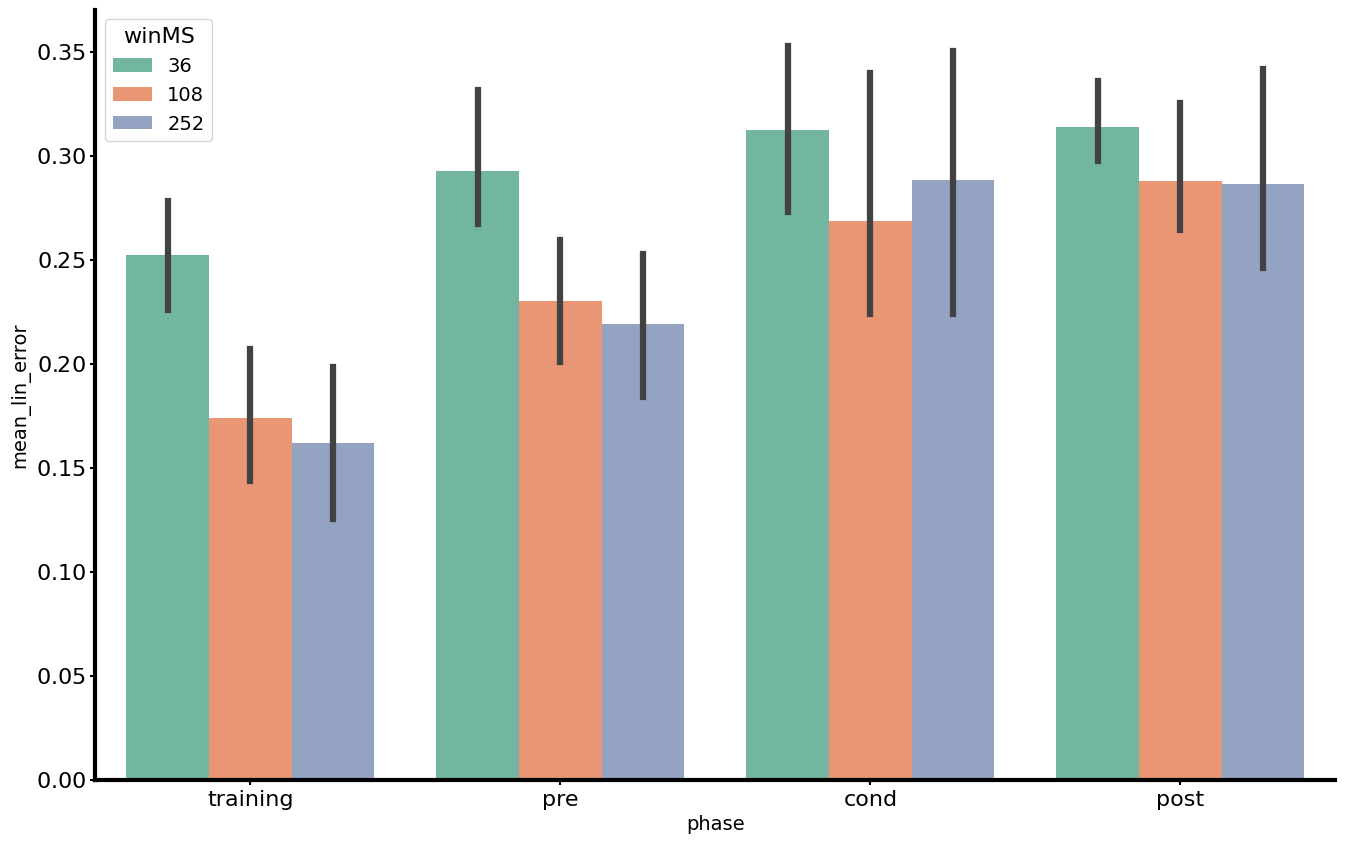

In [168]:
sns.barplot(
    data=loader_all.results_df.query("stride == '4'"),
    x="phase",
    y="mean_lin_error",
    hue="winMS",
    order=["training", "pre", "cond", "post"],
    palette="Set2",
)
plt.savefig(os.path.join(main_dir, "mean_lin_error_phase_winMS_stride4.png"), dpi=300)

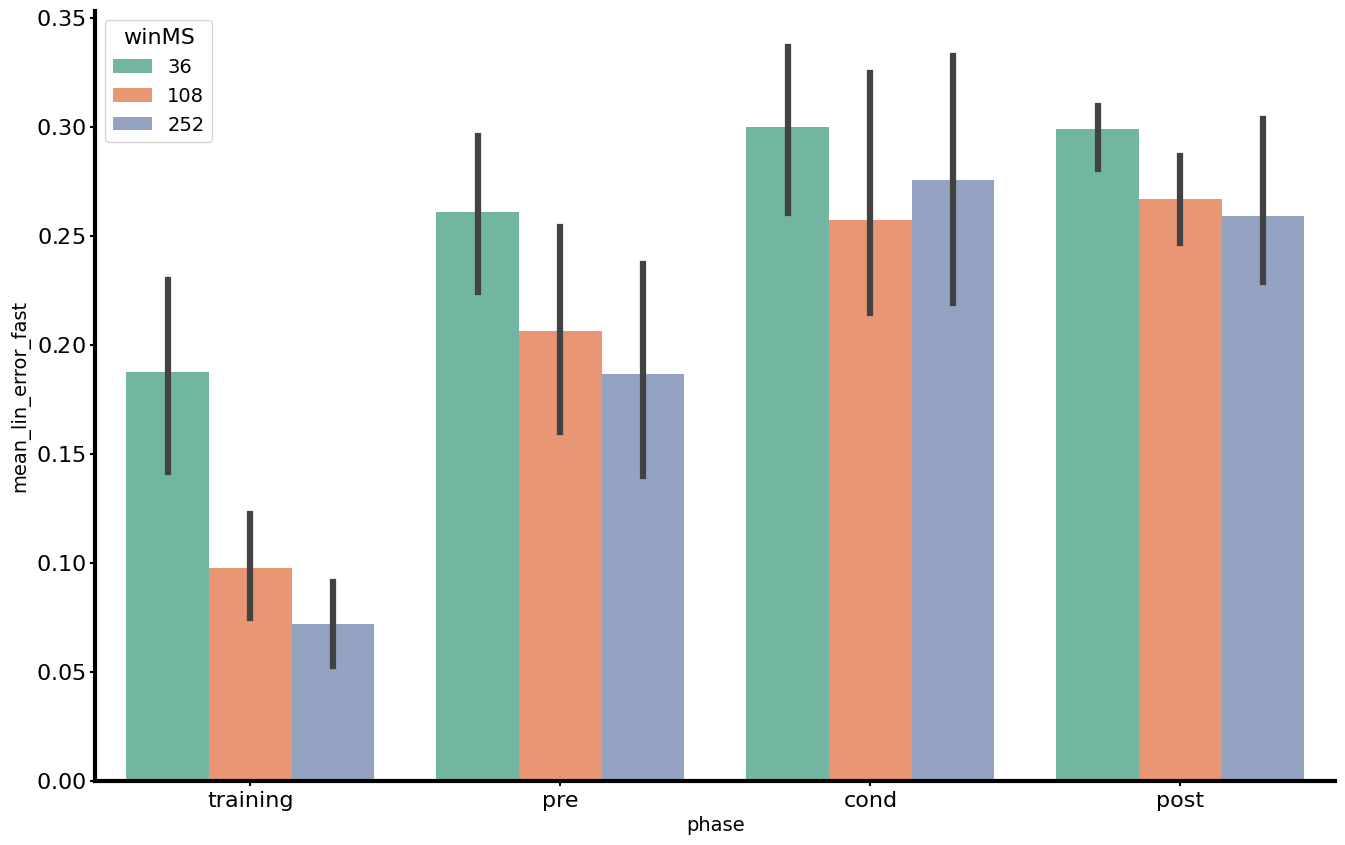

In [169]:
sns.barplot(
    data=loader_all.results_df.query("stride == '4'"),
    x="phase",
    y="mean_lin_error_fast",
    hue="winMS",
    order=["training", "pre", "cond", "post"],
    palette="Set2",
)
plt.savefig(
    os.path.join(main_dir, "mean_lin_error_fast_phase_winMS_stride4.png"), dpi=300
)

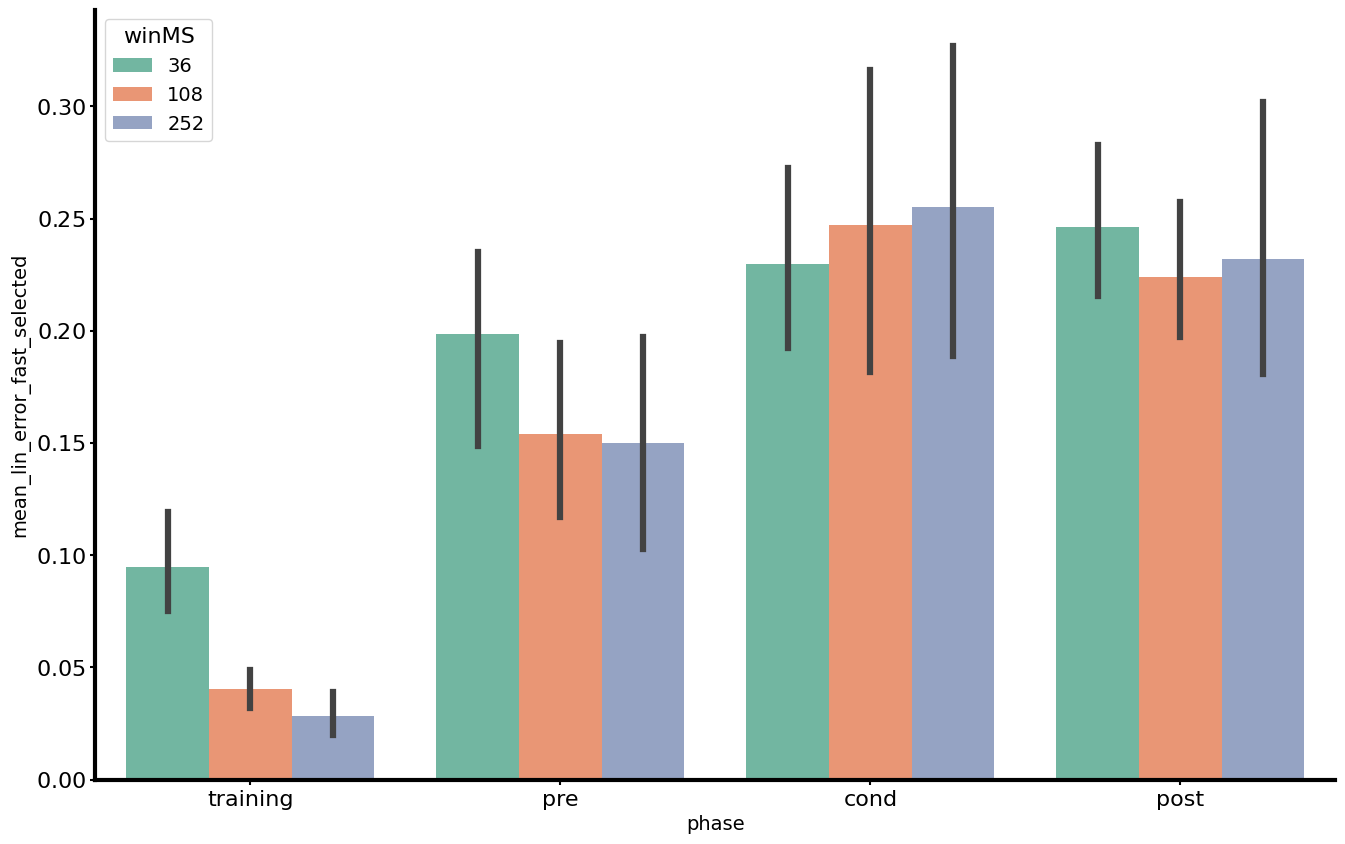

In [170]:
sns.barplot(
    data=loader_all.results_df.query("stride == '4'"),
    x="phase",
    y="mean_lin_error_fast_selected",
    hue="winMS",
    order=["training", "pre", "cond", "post"],
    palette="Set2",
)
plt.savefig(
    os.path.join(main_dir, "mean_lin_error_fast_selected_phase_winMS_stride4.png"),
    dpi=300,
)

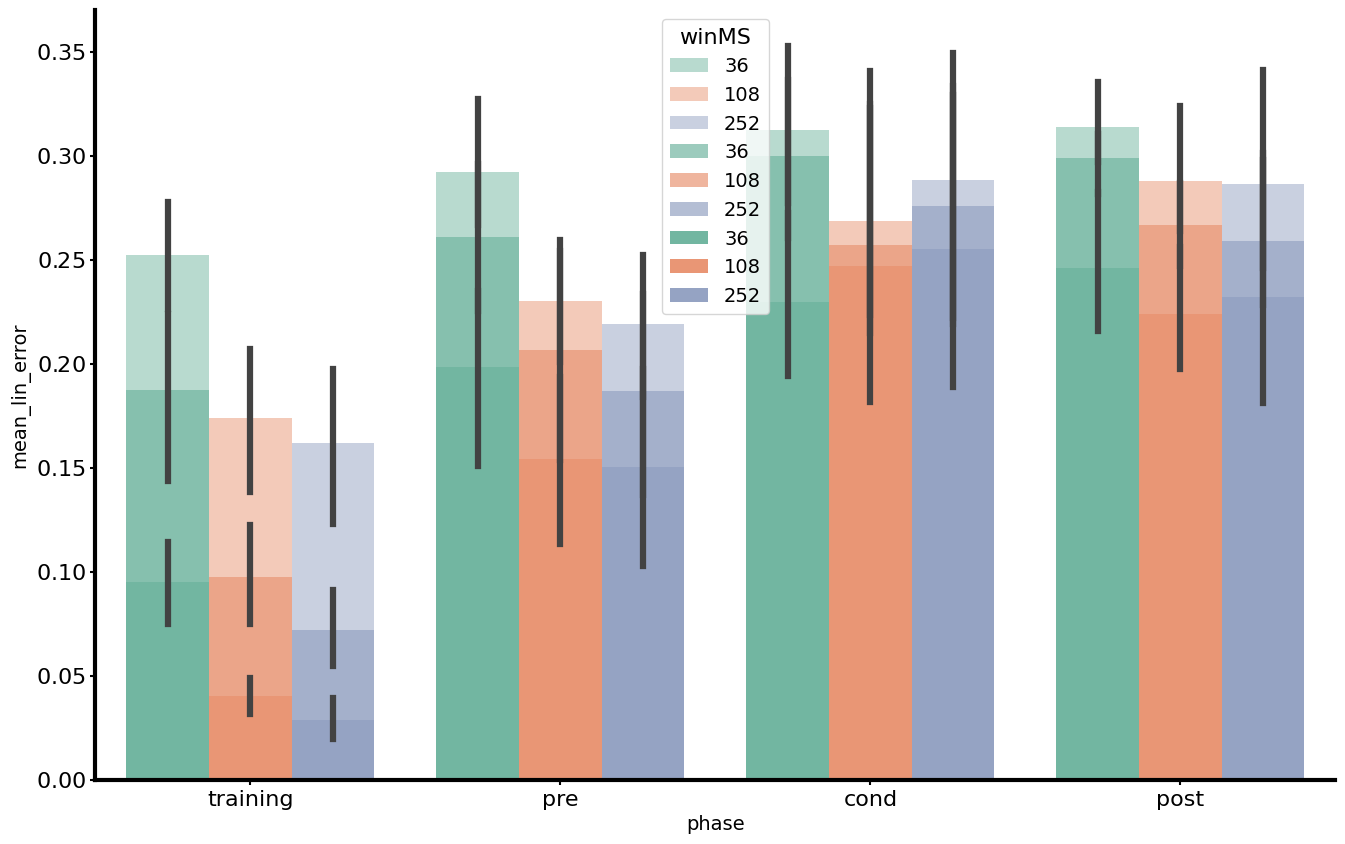

In [378]:
sns.barplot(
    data=loader_all.results_df.query("stride == '4'"),
    x="phase",
    y="mean_lin_error",
    hue="winMS",
    order=["training", "pre", "cond", "post"],
    palette="Set2",
    alpha=0.5,
)
sns.barplot(
    data=loader_all.results_df.query("stride == '4'"),
    x="phase",
    y="mean_lin_error_fast",
    hue="winMS",
    order=["training", "pre", "cond", "post"],
    palette="Set2",
    alpha=0.7,
)
sns.barplot(
    data=loader_all.results_df.query("stride == '4'"),
    x="phase",
    y="mean_lin_error_fast_selected",
    hue="winMS",
    order=["training", "pre", "cond", "post"],
    palette="Set2",
    alpha=1,
)
plt.savefig(
    os.path.join(main_dir, "mean_lin_error_and_fast_selected_phase_winMS_stride4.png"),
    dpi=300,
)

In [180]:
loader_all.results_df["mean_lin_error_fast_bayes"] = loader_all.results_df.apply(
    lambda row: np.nanmean(row["lin_error_bayes"][row["speedMask"]])
    if row["speedMask"] is not None
    else np.nan,
    axis=1,
)

loader_all.results_df[
    "mean_lin_error_fast_selected_bayes"
] = loader_all.results_df.apply(
    lambda row: np.nanmean(
        row["lin_error_bayes"][
            ((row["speedMask"]) & (row["bayesProba"] > row["bayesProbThreshold"]))
        ]
    )
    if row["speedMask"] is not None
    else np.nan,
    axis=1,
)

/tmp/ipykernel_112559/1017312758.py:2: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_112559/1017312758.py:5: RuntimeWarning:

Mean of empty slice



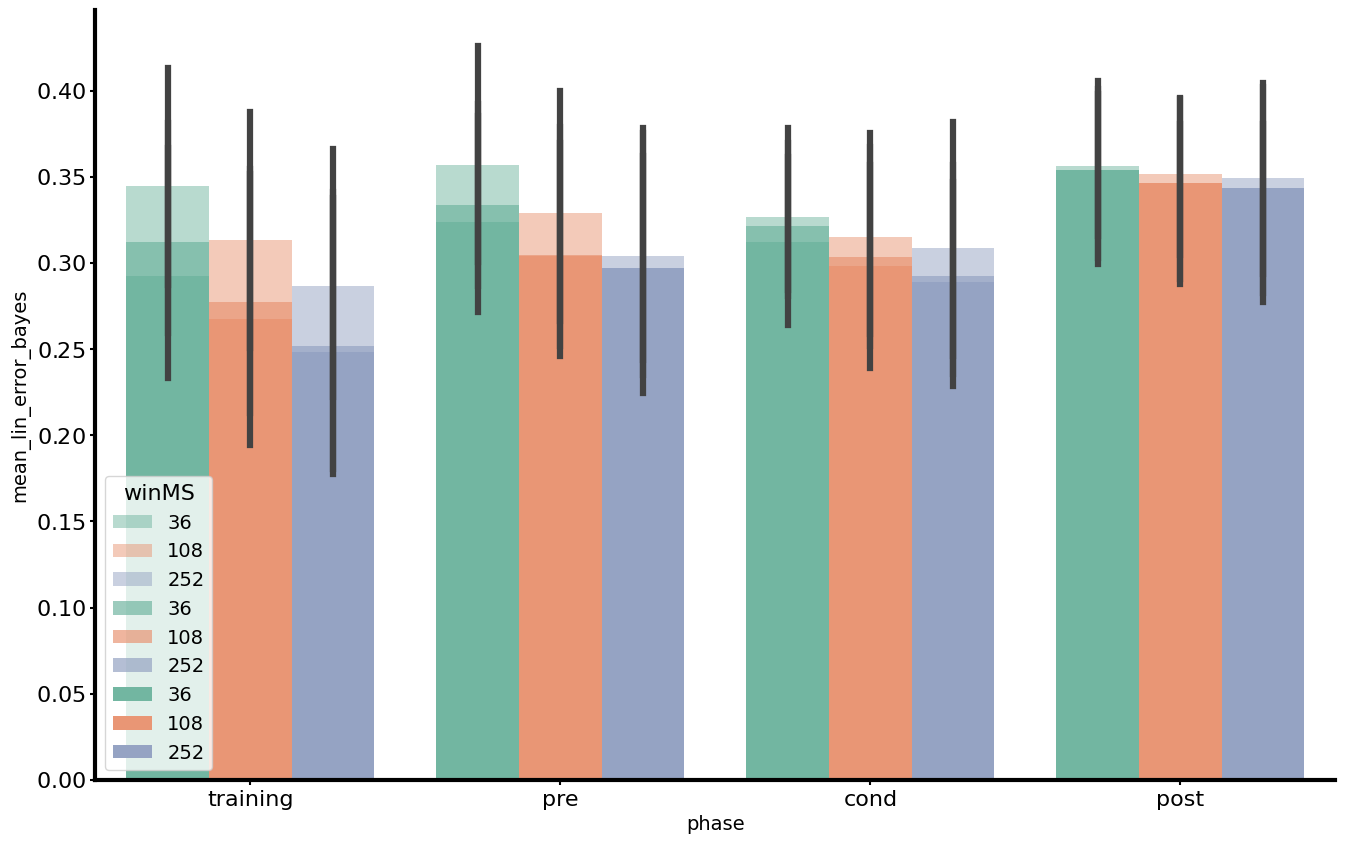

In [184]:
sns.barplot(
    data=loader_all.results_df,
    x="phase",
    y="mean_lin_error_bayes",
    hue="winMS",
    order=["training", "pre", "cond", "post"],
    palette="Set2",
    alpha=0.5,
)
sns.barplot(
    data=loader_all.results_df,
    x="phase",
    y="mean_lin_error_fast_bayes",
    hue="winMS",
    order=["training", "pre", "cond", "post"],
    palette="Set2",
    alpha=0.7,
)
sns.barplot(
    data=loader_all.results_df,
    x="phase",
    y="mean_lin_error_fast_selected_bayes",
    hue="winMS",
    order=["training", "pre", "cond", "post"],
    palette="Set2",
    alpha=1,
)
plt.savefig(
    os.path.join(main_dir, "mean_lin_error_bayes_and_fast_selected_phase_winMS.png"),
    dpi=300,
)

In [200]:
import dill as pickle

with open(
    "/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer/results/252/decoding_results_pre.pkl",
    "rb",
) as f:
    decoding_results = pickle.load(f)


Processing suffix: _training (tag: training)


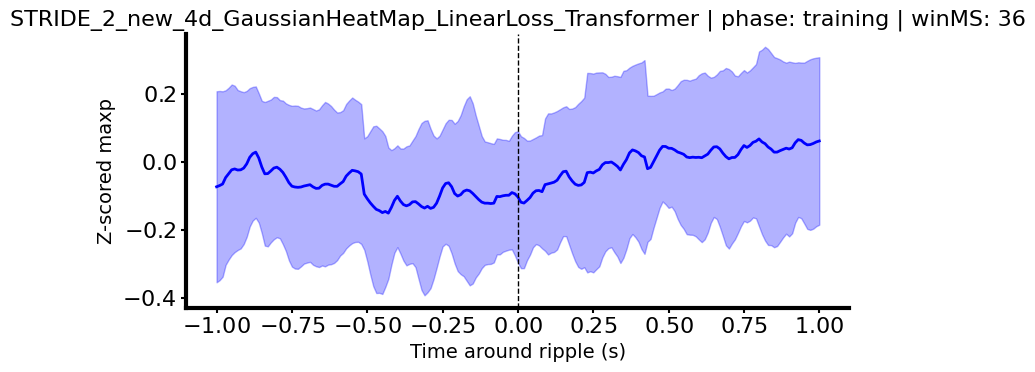

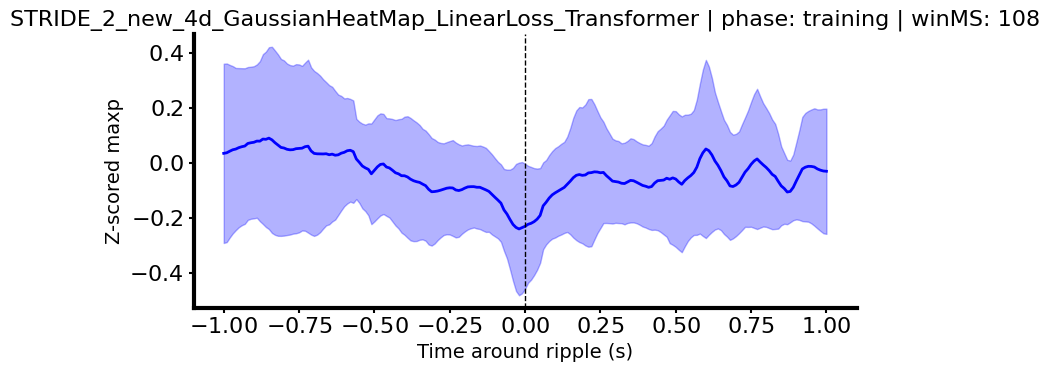

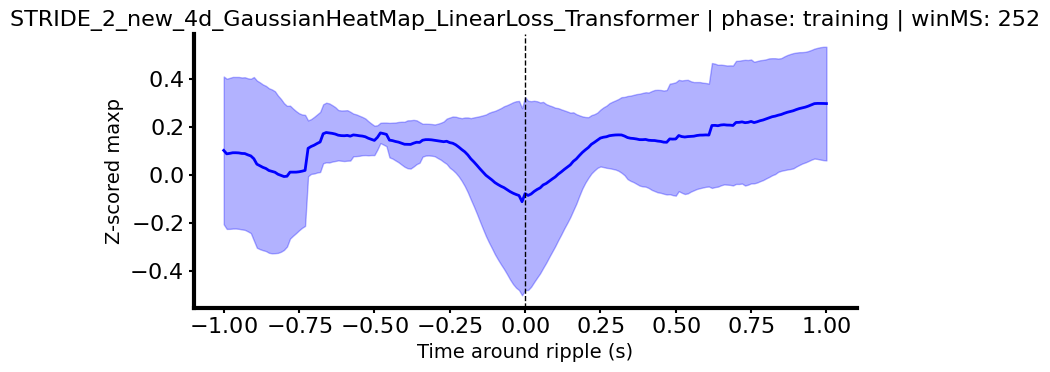

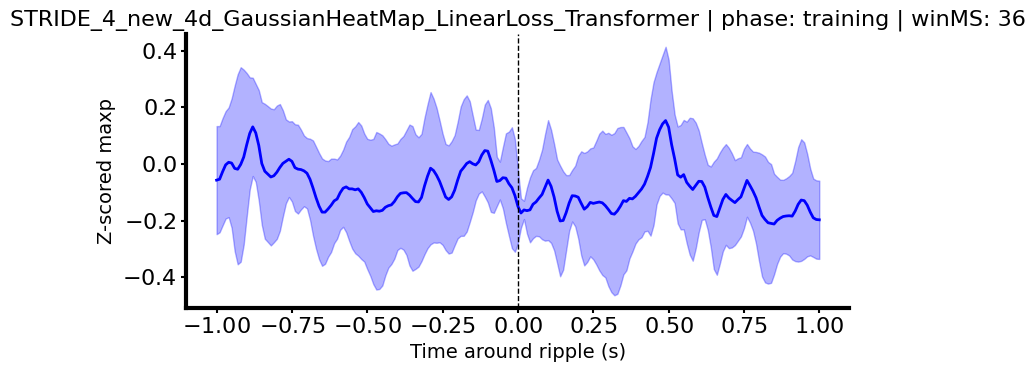

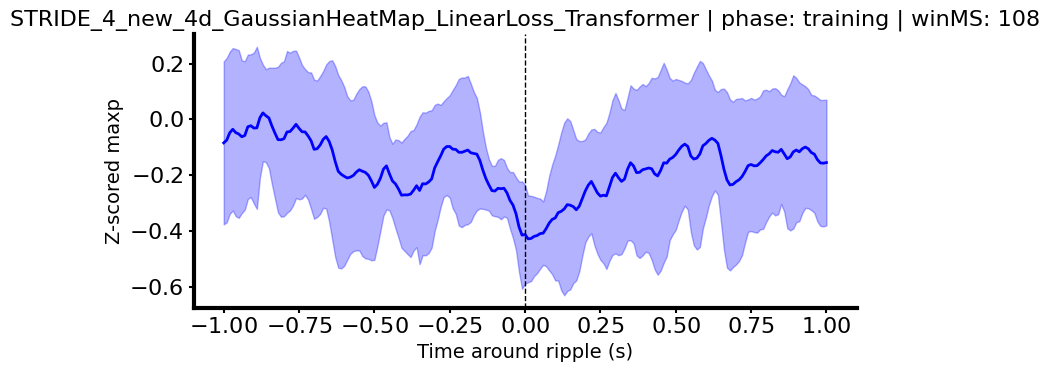

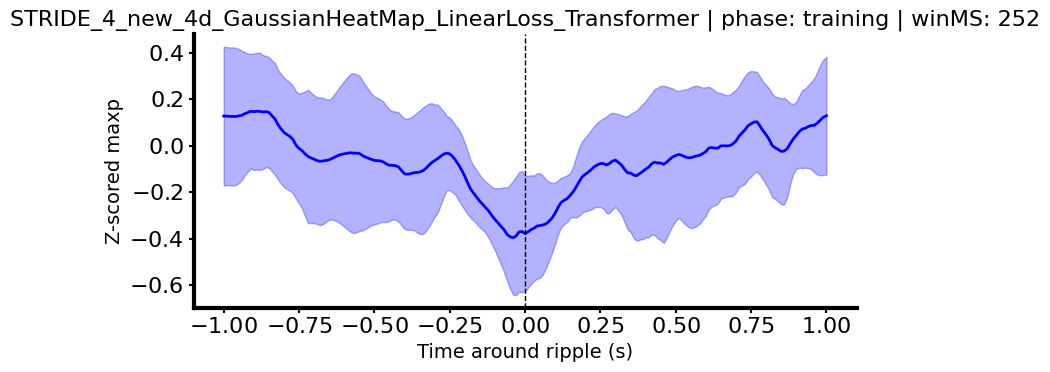

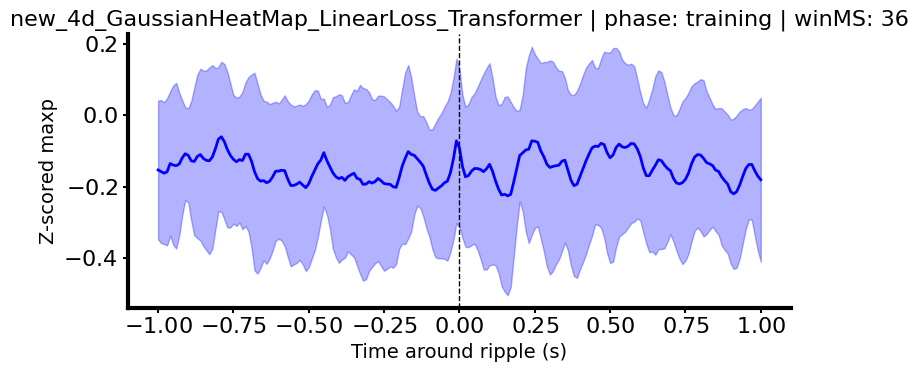

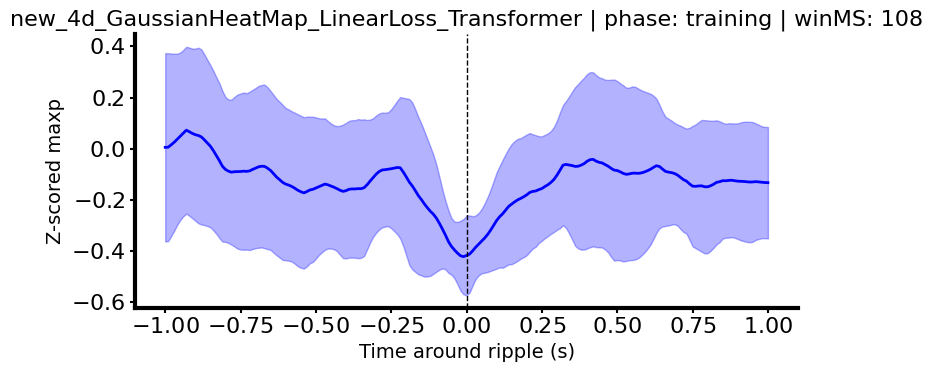

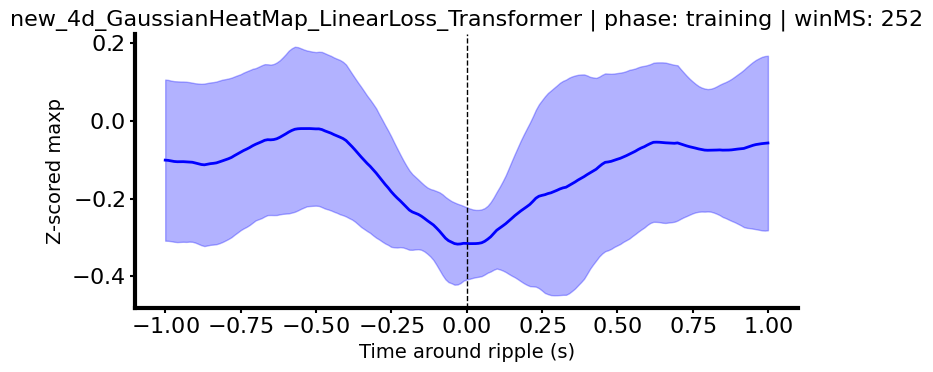

In [216]:
loader_all.around_ripples(suffixes=["_training"], show=True, around=1, against="maxp")

In [217]:
loader_all


Results_Loader Object

NameExp                                                | Names      | Phases   | TimeWindows
--------------------------------------------------------------------------------------------
new_4d_GaussianHeatMap_LinearLoss_Transformer          | M1199PAG   | cond     | 108        
STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer | M994PAG    | training | 252        
STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Transformer | M1239MFB   | pre      | 36         
                                                       | M1230Novel | post     |            
                                                       | M1230Known |          |            
                                                       | M1162MFB   |          |            
                                                       | M1199PAG   |          |            
                                                       | M994PAG    |          |            
                                              

In [340]:
main_dir

'/home/mickey/Dropbox/Mobs_member/Theotime_De_Charrin/Figures'

applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask 

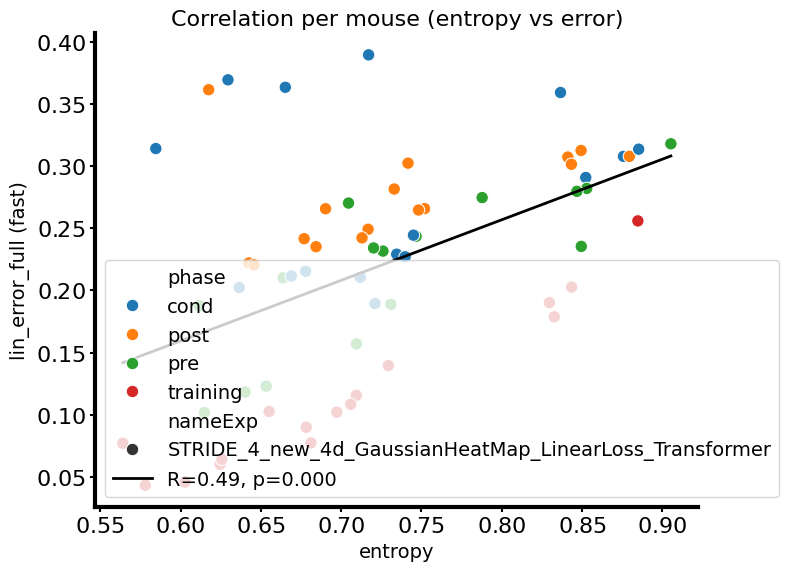

In [342]:
loader_all.correlation_per_mouse(
    against="entropy",
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=True,
    speed="fast",
    folder=main_dir,
    zscore=False,
)

applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask 

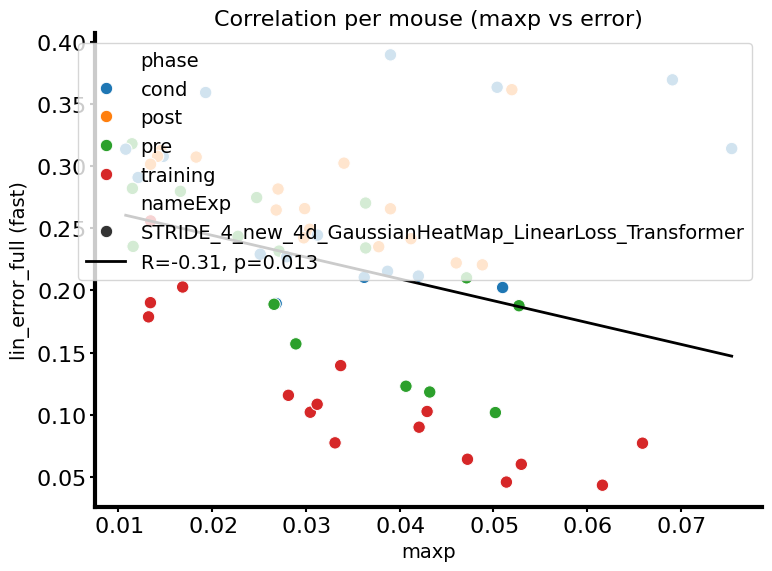

In [343]:
loader_all.correlation_per_mouse(
    against="maxp",
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=True,
    speed="fast",
    folder=main_dir,
    zscore=False,
)

applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array


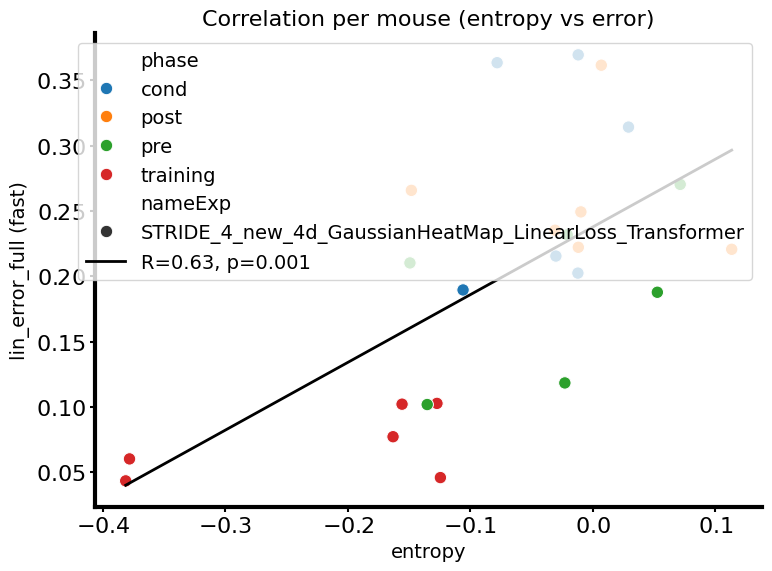

In [241]:
loader_all.correlation_per_mouse(
    against="entropy",
    winMS_list=[252],
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=True,
    speed="fast",
    folder=main_dir,
    zscore=True,
)

In [240]:
loader_all.correlation_per_mouse(
    against="entropy",
    winMS_list=[252],
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=False,
    speed="fast",
    folder=main_dir,
    zscore=False,
)
loader_all.correlation_per_mouse(
    against="maxp",
    winMS_list=[252],
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=False,
    speed="fast",
    folder=main_dir,
    zscore=True,
)
loader_all.correlation_per_mouse(
    against="maxp",
    winMS_list=[252],
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=False,
    speed="fast",
    folder=main_dir,
    zscore=False,
)


Processing suffix: _cond (tag: cond)
Skipping nameExp STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Transformer
Skipping nameExp STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Transformer
Skipping nameExp STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Transformer


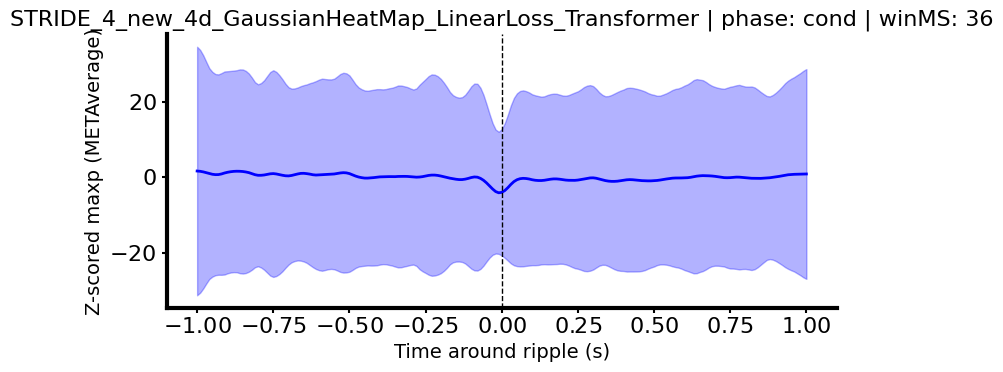

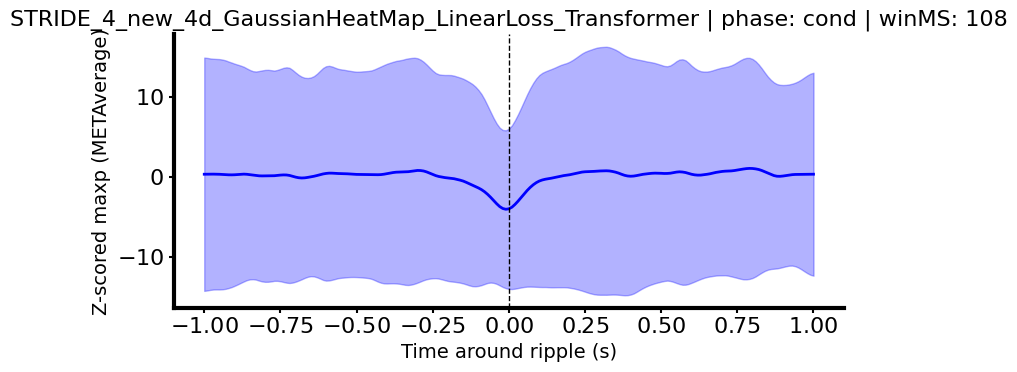

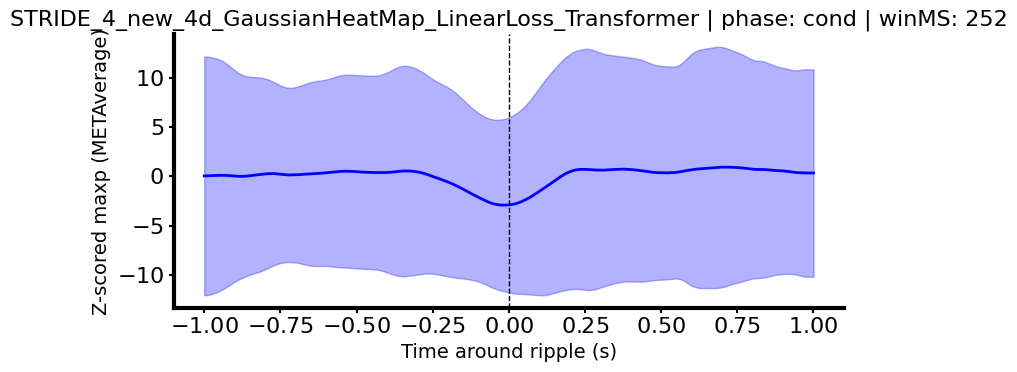

Skipping nameExp new_4d_GaussianHeatMap_LinearLoss_Transformer
Skipping nameExp new_4d_GaussianHeatMap_LinearLoss_Transformer
Skipping nameExp new_4d_GaussianHeatMap_LinearLoss_Transformer


In [220]:
loader_all.around_ripples_METAverage(
    nameExp=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    suffixes=["_cond"],
    show=True,
    around=1,
    against="maxp",
    folder=main_dir,
)

applying mask to error array
Failed to load spike clusters for M1162MFB: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
applying mask to error array
Failed to load spike clusters for M1162MFB: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/last_bayes/results/clusters_time_pre_wTrain_True.pkl'
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
applying mask to error array
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or di

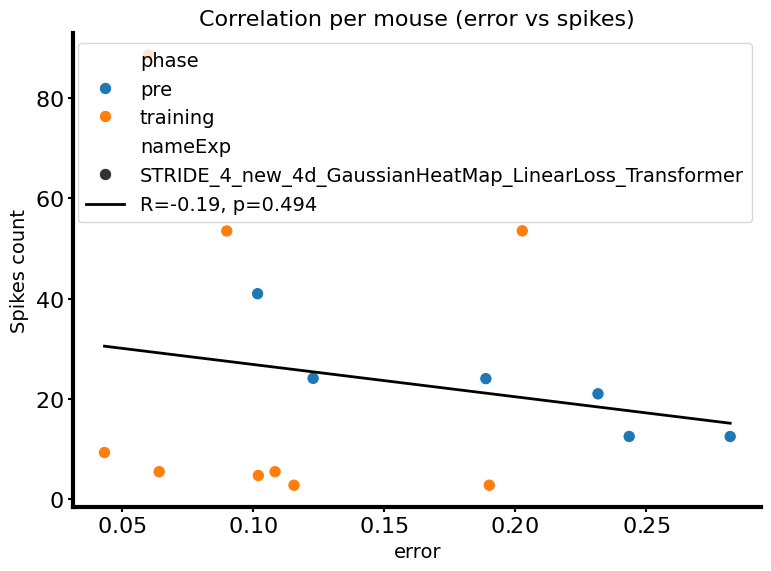

In [379]:
loader_all.correlation_per_mouse_spikes(
    suffixes=["_pre", "_training"],
    against="error",
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=True,
    folder=main_dir,
    speed="fast",
)

applying mask to error array
Failed to load spike clusters for M1162MFB: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
applying mask to error array
Failed to load spike clusters for M1162MFB: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/last_bayes/results/clusters_time_pre_wTrain_True.pkl'
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
applying mask to error array
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or di

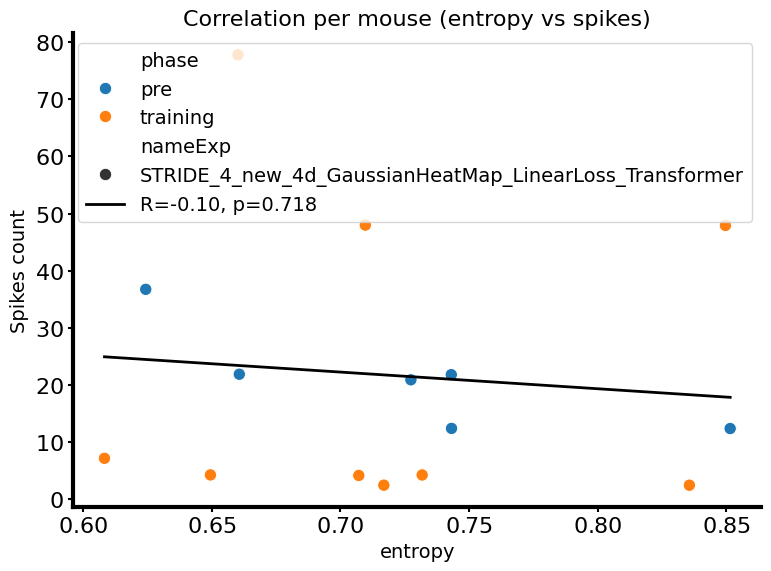

applying mask to error array
Failed to load spike clusters for M1162MFB: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
applying mask to error array
Failed to load spike clusters for M1162MFB: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/last_bayes/results/clusters_time_pre_wTrain_True.pkl'
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
applying mask to error array
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
applying mask to error array
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or di

In [257]:
loader_all.correlation_per_mouse_spikes(
    suffixes=["_pre", "_training"],
    against="entropy",
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=True,
    folder=main_dir,
)
loader_all.correlation_per_mouse_spikes(
    suffixes=["_pre", "_training"],
    against="maxp",
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=False,
    folder=main_dir,
)
loader_all.correlation_per_mouse_spikes(
    suffixes=["_pre", "_training"],
    against="error",
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=False,
    folder=main_dir,
)

Failed to load spike clusters for M1162MFB: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
Failed to load spike clusters for M1162MFB: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/last_bayes/results/clusters_time_pre_wTrain_True.pkl'
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M

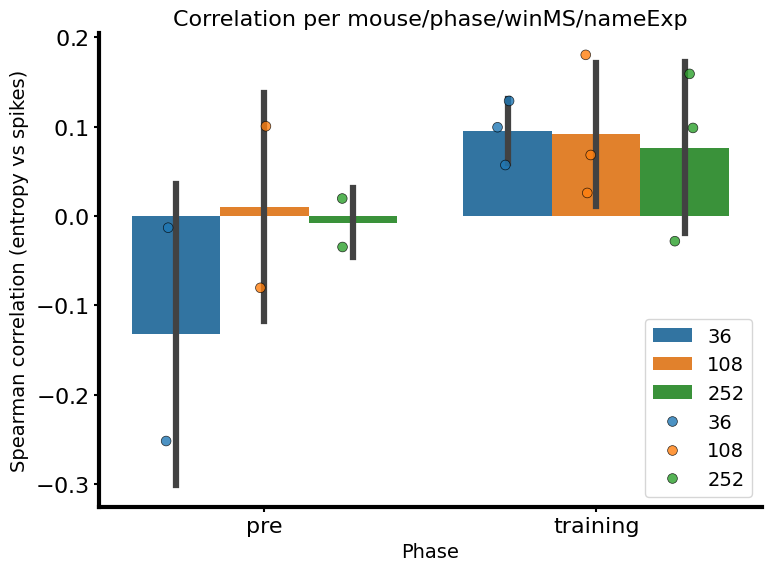

Failed to load spike clusters for M1162MFB: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
Failed to load spike clusters for M1162MFB: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/last_bayes/results/clusters_time_pre_wTrain_True.pkl'
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/last_bayes/results/clusters_time_pre_wTrain_False.pkl'
Failed to load spike clusters for M1230Novel: [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M

In [258]:
loader_all.barplot_correlation_spikes(
    suffixes=["_pre", "_training"],
    against="entropy",
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=True,
    folder=main_dir,
)
loader_all.barplot_correlation_spikes(
    suffixes=["_pre", "_training"],
    against="maxp",
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=False,
    folder=main_dir,
)
loader_all.barplot_correlation_spikes(
    suffixes=["_pre", "_training"],
    against="error",
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=False,
    folder=main_dir,
)

In [261]:
loader_all.results_df.keys()

Index(['nameExp', 'mouse', 'manipe', 'phase', 'winMS', 'asymmetry_index',
       'fullTruePos_fromBehavior', 'alignedTruePos_fromBehavior',
       'fullTrueLinPos_from_behavior', 'alignedTrueLinPos_from_behavior',
       'fullTimeBehavior', 'alignedTimeBehavior', 'timeNN', 'fullSpeed',
       'alignedSpeed', 'posIndex_NN', 'speedMask', 'linPred', 'fullPred',
       'truePos', 'linTruePos', 'predLoss', 'resultsNN',
       'direction_fromBehavior', 'direction_fromNN', 'bayesPred',
       'bayesLinPred', 'bayesProba', 'results', 'mouse_name', 'ann_mode',
       'mean_speed', 'mean_error', 'lin_error', 'predLossThreshold',
       'mean_error_selected', 'lin_error_selected',
       'asymmetry_index_on_predicted', 'asymmetry_index_on_selected_predicted',
       'training_asymmetry_index', 'real_asymmetry_ratio',
       'predicted_asymmetry_ratio', 'predicted_asymmetry_ratio_on_selected',
       'predicted_asymmetry_ratio_normalized',
       'selected_predicted_asymmetry_ratio_normalized',
  

In [281]:
loader_all.results_df["results"][0].load_trainers(which="ann")

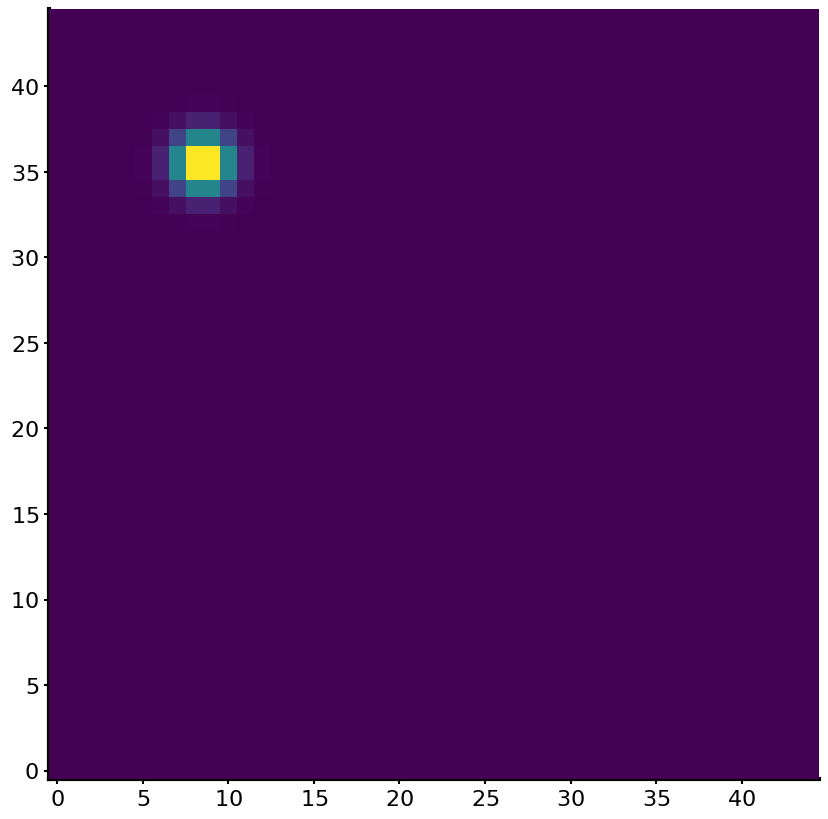

In [331]:
plt.imshow(gaussian_heatmap, zorder=10, origin="lower")

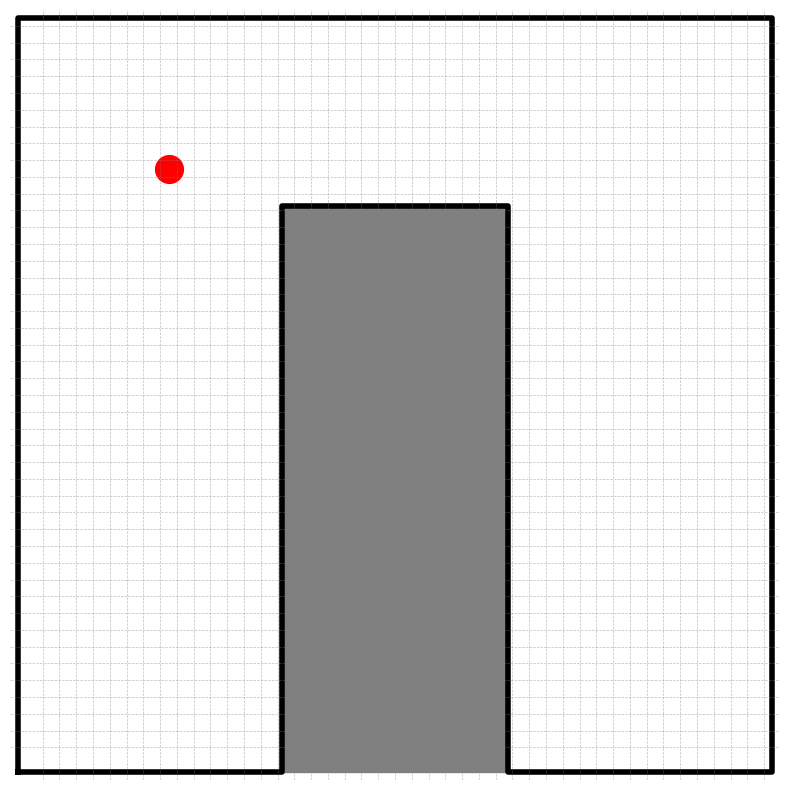

In [337]:
from neuroencoders.utils.global_classes import MAZE_COORDS

fig, ax = plt.subplots()
ax.plot(MAZE_COORDS[:, 0], MAZE_COORDS[:, 1], "k-", linewidth=4)
ax.set_xlim(-1e-2, 1.01)
ax.set_ylim(-1e-2, 1.01)
point_to_plot = np.array([0.2, 0.8]).reshape(-1, 2)
ax.scatter(point_to_plot[:, 0], point_to_plot[:, 1], s=400, c="red", marker="o")

# add 45x45 grid size
for i in range(1, 45):
    ax.axhline(i / 45 + 1 / 90, color="gray", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.axvline(i / 45 + 1 / 90, color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

# get forbid zone
forbid_zone = np.array([[0.35, 0.65], [0, 0.75]])
ax.fill(
    [
        forbid_zone[0, 0],
        forbid_zone[0, 1],
        forbid_zone[0, 1],
        forbid_zone[0, 0],
        forbid_zone[0, 0],
    ],
    [
        forbid_zone[1, 0],
        forbid_zone[1, 0],
        forbid_zone[1, 1],
        forbid_zone[1, 1],
        forbid_zone[1, 0],
    ],
    color="gray",
    alpha=1,
)
# remove ticks and spines
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_aspect("equal")
plt.savefig(os.path.join(main_dir, "maze_and_point.png"), dpi=300)
plt.show()

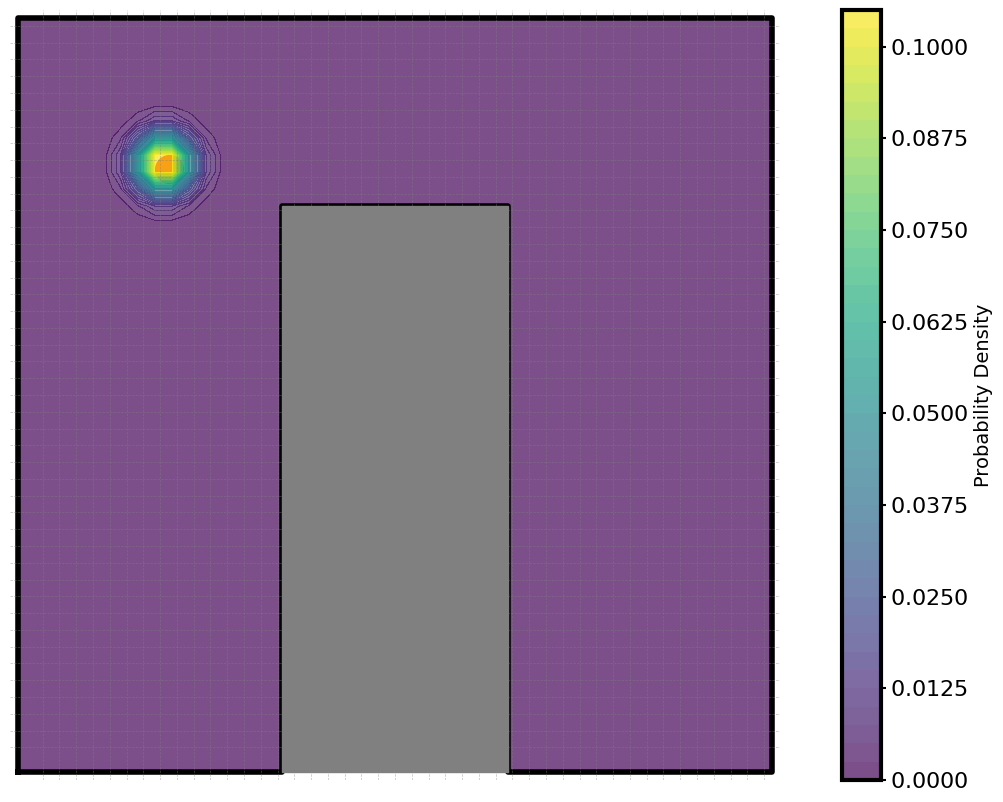

In [339]:
from neuroencoders.utils.global_classes import MAZE_COORDS

fig, ax = plt.subplots()
ax.plot(MAZE_COORDS[:, 0], MAZE_COORDS[:, 1], "k-", linewidth=4)
ax.set_xlim(-1e-2, 1.01)
ax.set_ylim(-1e-2, 1.01)
point_to_plot = np.array([0.2, 0.8]).reshape(-1, 2)
ax.scatter(point_to_plot[:, 0], point_to_plot[:, 1], s=400, c="red", marker="o")

# add 45x45 grid size
for i in range(1, 45):
    ax.axhline(i / 45 + 1 / 90, color="gray", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.axvline(i / 45 + 1 / 90, color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

# get forbid zone
forbid_zone = np.array([[0.35, 0.65], [0, 0.75]])
ax.fill(
    [
        forbid_zone[0, 0],
        forbid_zone[0, 1],
        forbid_zone[0, 1],
        forbid_zone[0, 0],
        forbid_zone[0, 0],
    ],
    [
        forbid_zone[1, 0],
        forbid_zone[1, 0],
        forbid_zone[1, 1],
        forbid_zone[1, 1],
        forbid_zone[1, 0],
    ],
    color="gray",
    alpha=1,
    zorder=2,
)
gaussian_heatmap = (
    loader_all.results_df["results"][0]
    .ann["108"]
    .GaussianHeatmap.gaussian_heatmap_targets(point_to_plot)[0]
    .numpy()
)
# returns a 45x45 array of probabilities
# plot the heatmap on top of the maze
contour = ax.contourf(
    np.linspace(0, 1, 45),
    np.linspace(0, 1, 45),
    gaussian_heatmap.reshape(45, 45),
    levels=50,
    cmap="viridis",
    alpha=0.7,
)
# ax.imshow(
#     gaussian_heatmap, zorder = 0, origin = "lower", extent=(0,1,0,1), cmap='viridis', alpha=0.7
# )
plt.colorbar(contour, ax=ax, label="Probability Density")
# remove ticks and spines
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_aspect("equal")
plt.savefig(os.path.join(main_dir, "maze_and_point_and_prob.png"), dpi=300)
plt.show()

In [344]:
loader_all.results_df

nameExp mouse manipe     phase  \
0        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB      cond   
1        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB      cond   
2        new_4d_GaussianHeatMap_LinearLoss_Transformer  1162    MFB      cond   
3    STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB      cond   
136  STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB      cond   
..                                                 ...   ...    ...       ...   
134  STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   
135  STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   
205  STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   
206  STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   
207  STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   

     winMS  asymmetry_index  \
0       36         3.160724   
1      108         3.160724   
2      252         3.160724   
3      252         3.160724   
136     36         3.160724   
..     ...              ...   
134    108         2.001375   
135    252         2.001375   
205     36         2.001375   
206    108         2.001375   
207    252         2.001375   

                              fullTruePos_fromBehavior  \
0    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
1    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
2    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
3    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
136  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
..                                                 ...   
134  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
135  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
205  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
206  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
207  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   

                           alignedTruePos_fromBehavior  \
0    [[0.26793240284576997, 0.8295787420565349], [0...   
1    [[0.26793240284576997, 0.8295787420565349], [0...   
2    [[0.26793240284576997, 0.8295787420565349], [0...   
3    [[0.26793240284576997, 0.8295787420565349], [0...   
136  [[0.5321644044431648, 0.9915833623122323], [0....   
..                                                 ...   
134  [[0.802539763175163, 0.04998183919827476], [0....   
135  [[0.802539763175163, 0.04998183919827476], [0....   
205  [[0.802539763175163, 0.04998183919827476], [0....   
206  [[0.802539763175163, 0.04998183919827476], [0....   
207  [[0.802539763175163, 0.04998183919827476], [0....   

                          fullTrueLinPos_from_behavior  \
0    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
1    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
136  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
..                                                 ...   
134  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
135  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
205  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
206  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
207  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                       alignedTrueLinPos_from_behavior  ... mean_lin_error  \
0    [0.36751459806271514, 0.36751459806271514, 0.3...  ...       0.254456   
1    [0.36751459806271514, 0.36751459806271514, 0.3...  ...       0.225950   
2    [0.36751459806271514, 0.36751459806271514, 0.3...  ...       0.262793   
3    [0.36751459806271514, 0.36751459806271514, 0.3...  ...       0.317262   
136  [0.5212138509557749, 0.10908862861612689, 0.09...  ...       0.307154   
..                                                 ...  ...            ...   
134  [0.9863637793433644, 0.9863637793433644, 0.986...  ...     

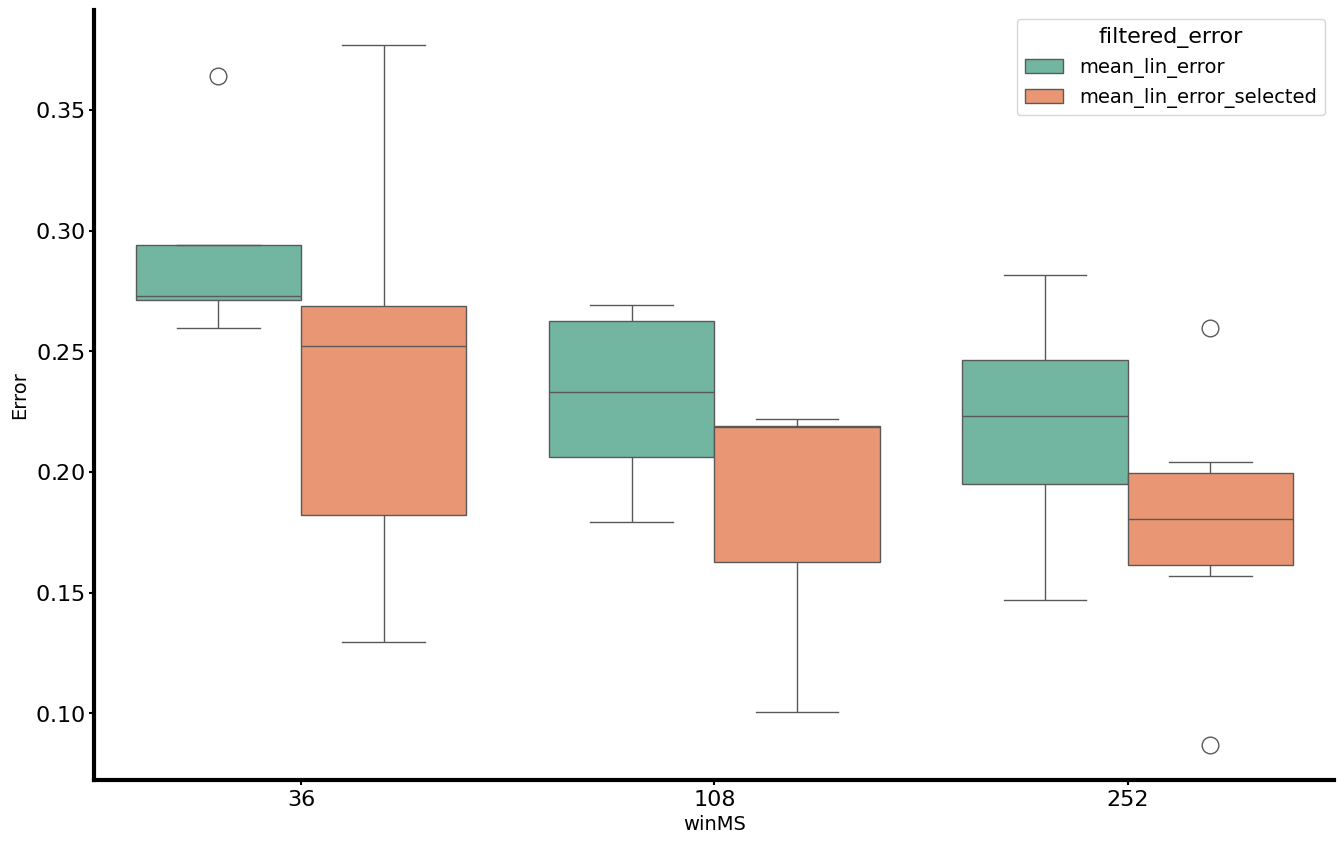

In [358]:
phase = "pre"
sub_df = loader_all.results_df[
    (loader_all.results_df["phase"] == phase)
    & (
        loader_all.results_df["nameExp"]
        == "STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"
    )
].copy()
long_df = pd.melt(
    sub_df,
    id_vars=["mouse", "winMS"],
    value_vars=["mean_lin_error", "mean_lin_error_selected"],
    var_name="filtered_error",
    value_name="Error",
)
sns.boxplot(data=long_df, x="winMS", y="Error", hue="filtered_error", palette="Set2")
plt.savefig(os.path.join(main_dir, "boxplot_mean_lin_error_and_selected.png"), dpi=300)
plt.savefig(os.path.join(main_dir, "boxplot_mean_lin_error_and_selected.svg"), dpi=300)

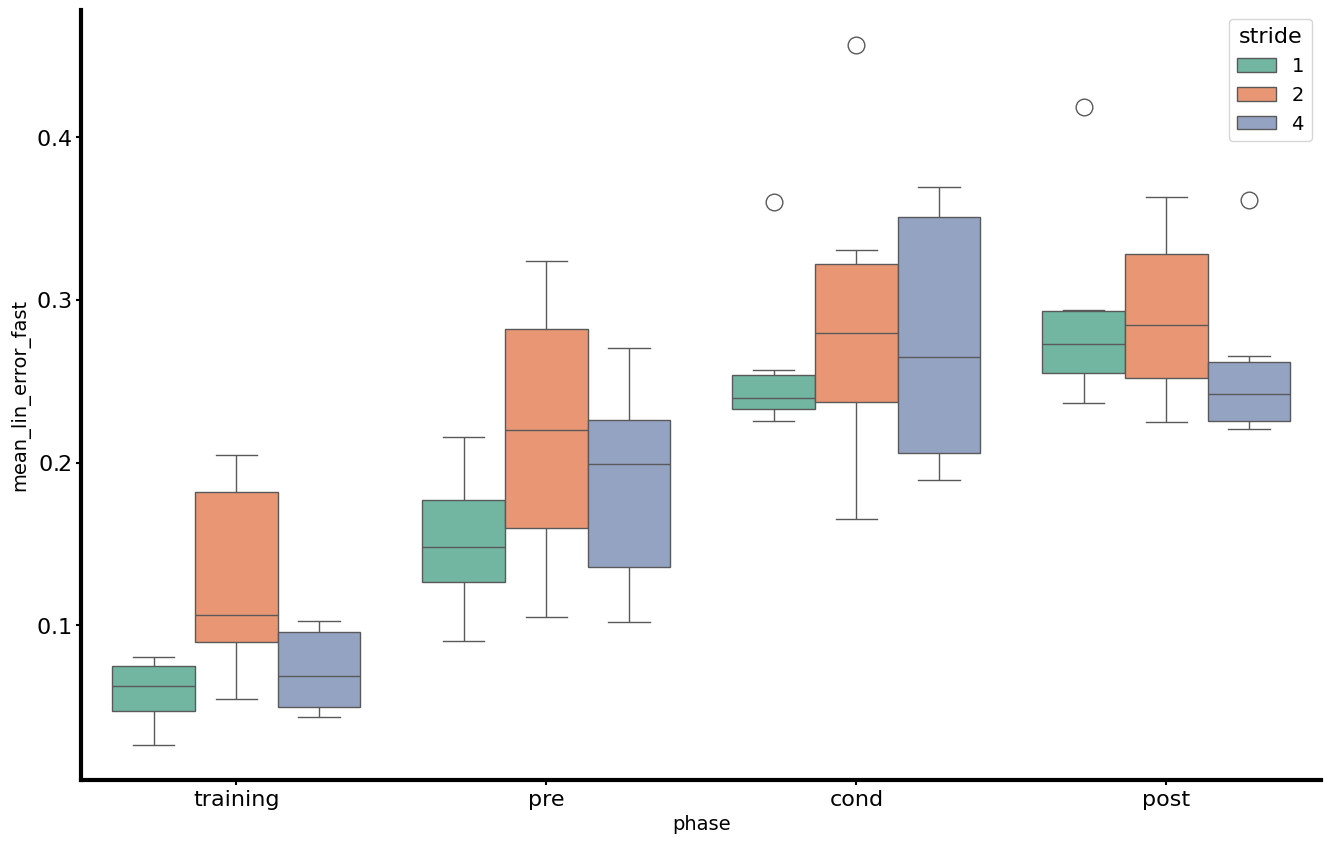

In [361]:
sns.boxplot(
    loader_all.results_df.query("winMS == 252"),
    x="phase",
    y="mean_lin_error_fast",
    hue="stride",
    palette="Set2",
    hue_order=["1", "2", "4"],
    order=["training", "pre", "cond", "post"],
)

plt.savefig(
    os.path.join(
        main_dir,
        "..",
        "Presentation",
        "boxplot_mean_lin_error_fast_per_phase_and_stride.png",
    ),
    dpi=300,
)
plt.savefig(
    os.path.join(
        main_dir,
        "..",
        "Presentation",
        "boxplot_mean_lin_error_fast_per_phase_and_stride.svg",
    ),
    dpi=300,
)

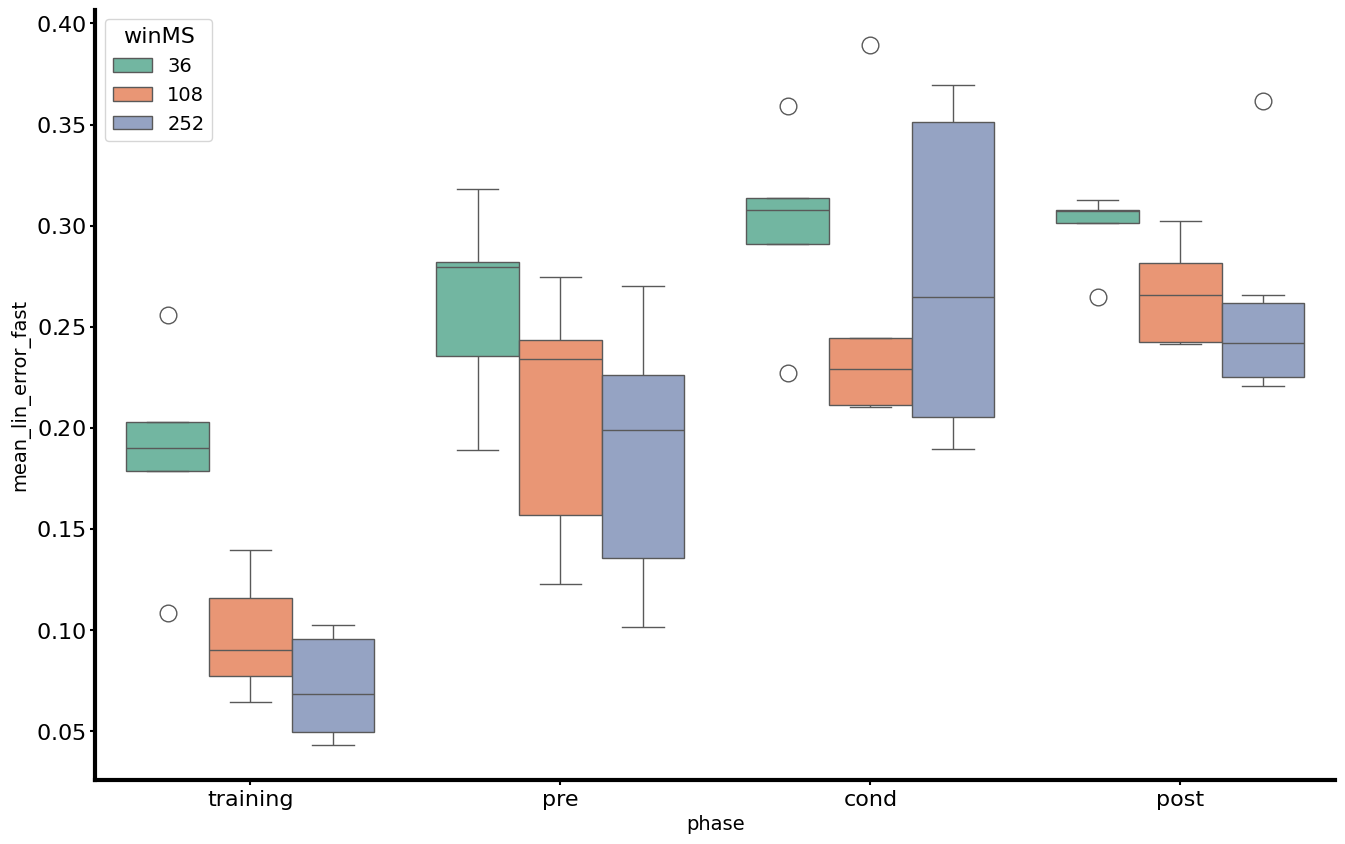

In [363]:
sns.boxplot(
    loader_all.results_df.query("stride == '4'"),
    x="phase",
    y="mean_lin_error_fast",
    hue="winMS",
    palette="Set2",
    order=["training", "pre", "cond", "post"],
)

plt.savefig(
    os.path.join(
        main_dir,
        "..",
        "Presentation",
        "boxplot_mean_lin_error_fast_per_phase_and_winMS.png",
    ),
    dpi=300,
)
plt.savefig(
    os.path.join(
        main_dir,
        "..",
        "Presentation",
        "boxplot_mean_lin_error_fast_per_phase_and_winMS.svg",
    ),
    dpi=300,
)

In [364]:
loader_all.results_df.keys()

Index(['nameExp', 'mouse', 'manipe', 'phase', 'winMS', 'asymmetry_index',
       'fullTruePos_fromBehavior', 'alignedTruePos_fromBehavior',
       'fullTrueLinPos_from_behavior', 'alignedTrueLinPos_from_behavior',
       'fullTimeBehavior', 'alignedTimeBehavior', 'timeNN', 'fullSpeed',
       'alignedSpeed', 'posIndex_NN', 'speedMask', 'linPred', 'fullPred',
       'truePos', 'linTruePos', 'predLoss', 'resultsNN',
       'direction_fromBehavior', 'direction_fromNN', 'bayesPred',
       'bayesLinPred', 'bayesProba', 'results', 'mouse_name', 'ann_mode',
       'mean_speed', 'mean_error', 'lin_error', 'predLossThreshold',
       'mean_error_selected', 'lin_error_selected',
       'asymmetry_index_on_predicted', 'asymmetry_index_on_selected_predicted',
       'training_asymmetry_index', 'real_asymmetry_ratio',
       'predicted_asymmetry_ratio', 'predicted_asymmetry_ratio_on_selected',
       'predicted_asymmetry_ratio_normalized',
       'selected_predicted_asymmetry_ratio_normalized',
  

In [367]:
loader_all


Results_Loader Object

NameExp                                                | Names      | Phases   | TimeWindows
--------------------------------------------------------------------------------------------
new_4d_GaussianHeatMap_LinearLoss_Transformer          | M1199PAG   | cond     | 108        
STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer | M994PAG    | training | 252        
STRIDE_2_new_4d_GaussianHeatMap_LinearLoss_Transformer | M1239MFB   | pre      | 36         
                                                       | M1230Novel | post     |            
                                                       | M1230Known |          |            
                                                       | M1162MFB   |          |            
                                                       | M1199PAG   |          |            
                                                       | M994PAG    |          |            
                                              

In [369]:
sub_df

nameExp mouse manipe     phase  \
3    STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB      cond   
7    STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB      post   
11   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB       pre   
15   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1162    MFB  training   
21   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1199    PAG      cond   
27   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1199    PAG      post   
33   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1199    PAG       pre   
39   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1199    PAG  training   
48   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1230  Novel      cond   
51   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1230  Known      cond   
60   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1230  Novel      post   
63   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1230  Known      post   
72   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1230  Novel       pre   
75   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1230  Known       pre   
84   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1230  Novel  training   
87   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1230  Known  training   
93   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1239    MFB      cond   
99   STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1239    MFB      post   
105  STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1239    MFB       pre   
111  STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...  1239    MFB  training   
117  STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG      cond   
123  STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG      post   
129  STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG       pre   
135  STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Tra...   994    PAG  training   

     winMS  asymmetry_index  \
3      252         3.160724   
7      252         1.896208   
11     252         1.019774   
15     252         1.019774   
21     252         0.159203   
27     252         2.498939   
33     252         0.802906   
39     252         0.802906   
48     252         0.437444   
51     252         0.788136   
60     252         0.943824   
63     252         0.757311   
72     252         2.018042   
75     252         0.610147   
84     252         2.018042   
87     252         0.610147   
93     252        25.771536   
99     252         2.744161   
105    252         1.406071   
111    252         1.406071   
117    252         0.203255   
123    252         0.300424   
129    252         2.001375   
135    252         2.001375   

                              fullTruePos_fromBehavior  \
3    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
7    [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
11   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
15   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
21   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
27   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
33   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
39   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
48   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
51   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
60   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
63   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
72   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
75   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
84   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
87   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
93   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
99   [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
105  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
111  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
117  [[nan, nan], [nan, nan

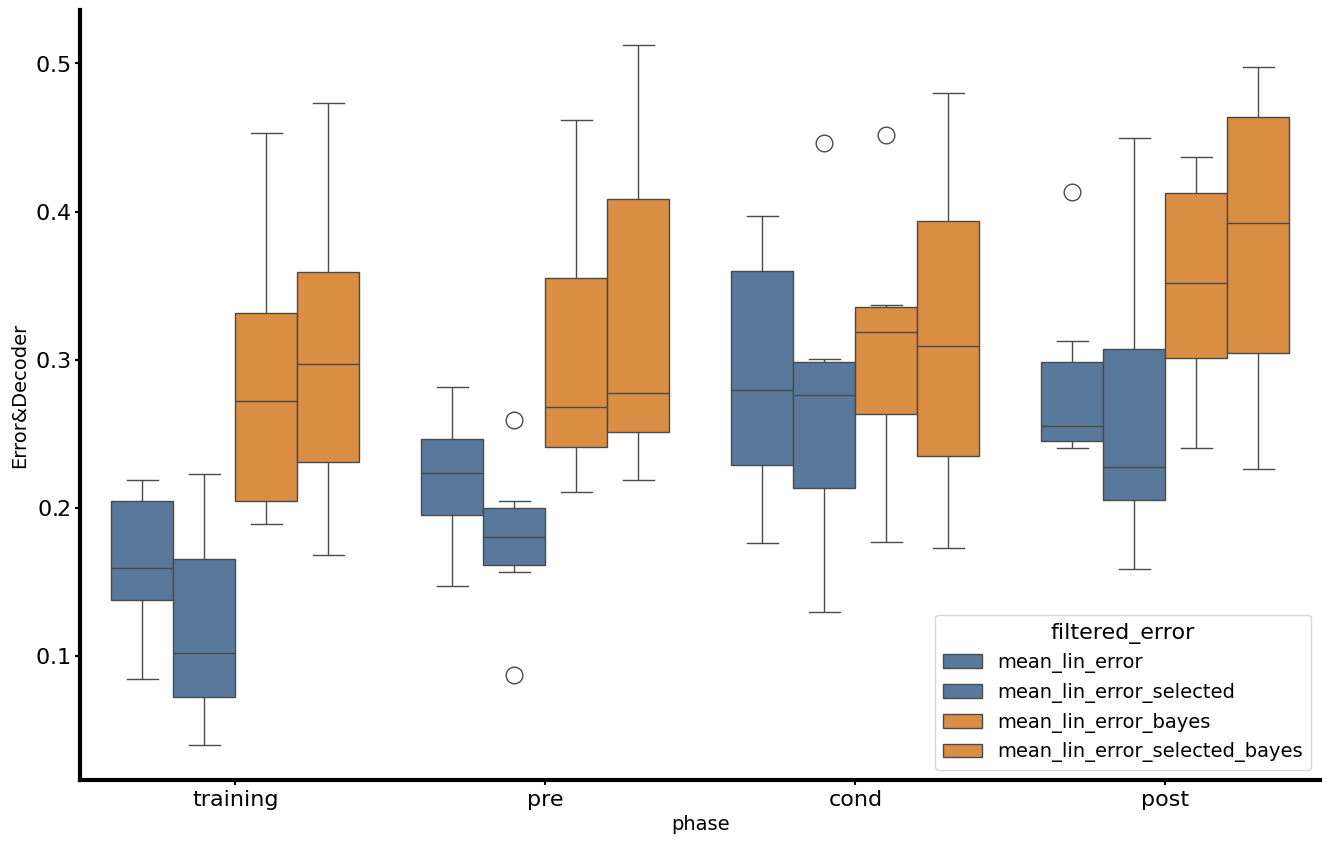

In [377]:
stride = "4"
winMS = 252
nameExp_bayes = "new_4d_GaussianHeatMap_LinearLoss_Transformer"
sub_df = loader_all.results_df.query("stride == @stride & winMS == @winMS").copy()
bayes_df = loader_all.results_df.query(
    "nameExp == @nameExp_bayes & winMS == @winMS"
).reset_index(drop=True)
sub_df = sub_df.reset_index(drop=True)
sub_df["mean_lin_error_bayes"] = bayes_df["mean_lin_error_bayes"].values
sub_df["mean_lin_error_selected_bayes"] = bayes_df[
    "mean_lin_error_selected_bayes"
].values

long_df = pd.melt(
    sub_df,
    id_vars=["mouse", "phase"],
    value_vars=[
        "mean_lin_error",
        "mean_lin_error_selected",
        "mean_lin_error_bayes",
        "mean_lin_error_selected_bayes",
    ],
    var_name="filtered_error",
    value_name="Error&Decoder",
)
# custom palette, different colors for ann and bayes : give "mean_lin_error" and "mean_lin_error_selected" the same palette color, and "mean_lin_error_bayes" and "mean_lin_error_selected_bayes" another palette color
palette = {
    "mean_lin_error": "#4E79A7",  # blue (ANN)
    "mean_lin_error_selected": "#4E79A7",  # blue (ANN, same as above)
    "mean_lin_error_bayes": "#F28E2B",  # orange (Bayes)
    "mean_lin_error_selected_bayes": "#F28E2B",  # orange (Bayes, same as above)
}
sns.boxplot(
    data=long_df,
    x="phase",
    y="Error&Decoder",
    hue="filtered_error",
    palette=palette,
    order=["training", "pre", "cond", "post"],
)
plt.savefig(
    os.path.join(
        main_dir,
        "..",
        "Presentation",
        "boxplot_mean_lin_error_and_selected_and_bayes.png",
    )
)
plt.savefig(
    os.path.join(
        main_dir,
        "..",
        "Presentation",
        "boxplot_mean_lin_error_and_selected_and_bayes.svg",
    )
)
plt.show()

In [280]:
loader_all.hist2d_linpred_vs_bayes(
    suffixes=["_pre"],
    mode="full",
    nameExps=["STRIDE_4_new_4d_GaussianHeatMap_LinearLoss_Transformer"],
    show=True,
    folder=main_dir,
    winMS_list=[252],
)

ValueError: x and y must have the same length.

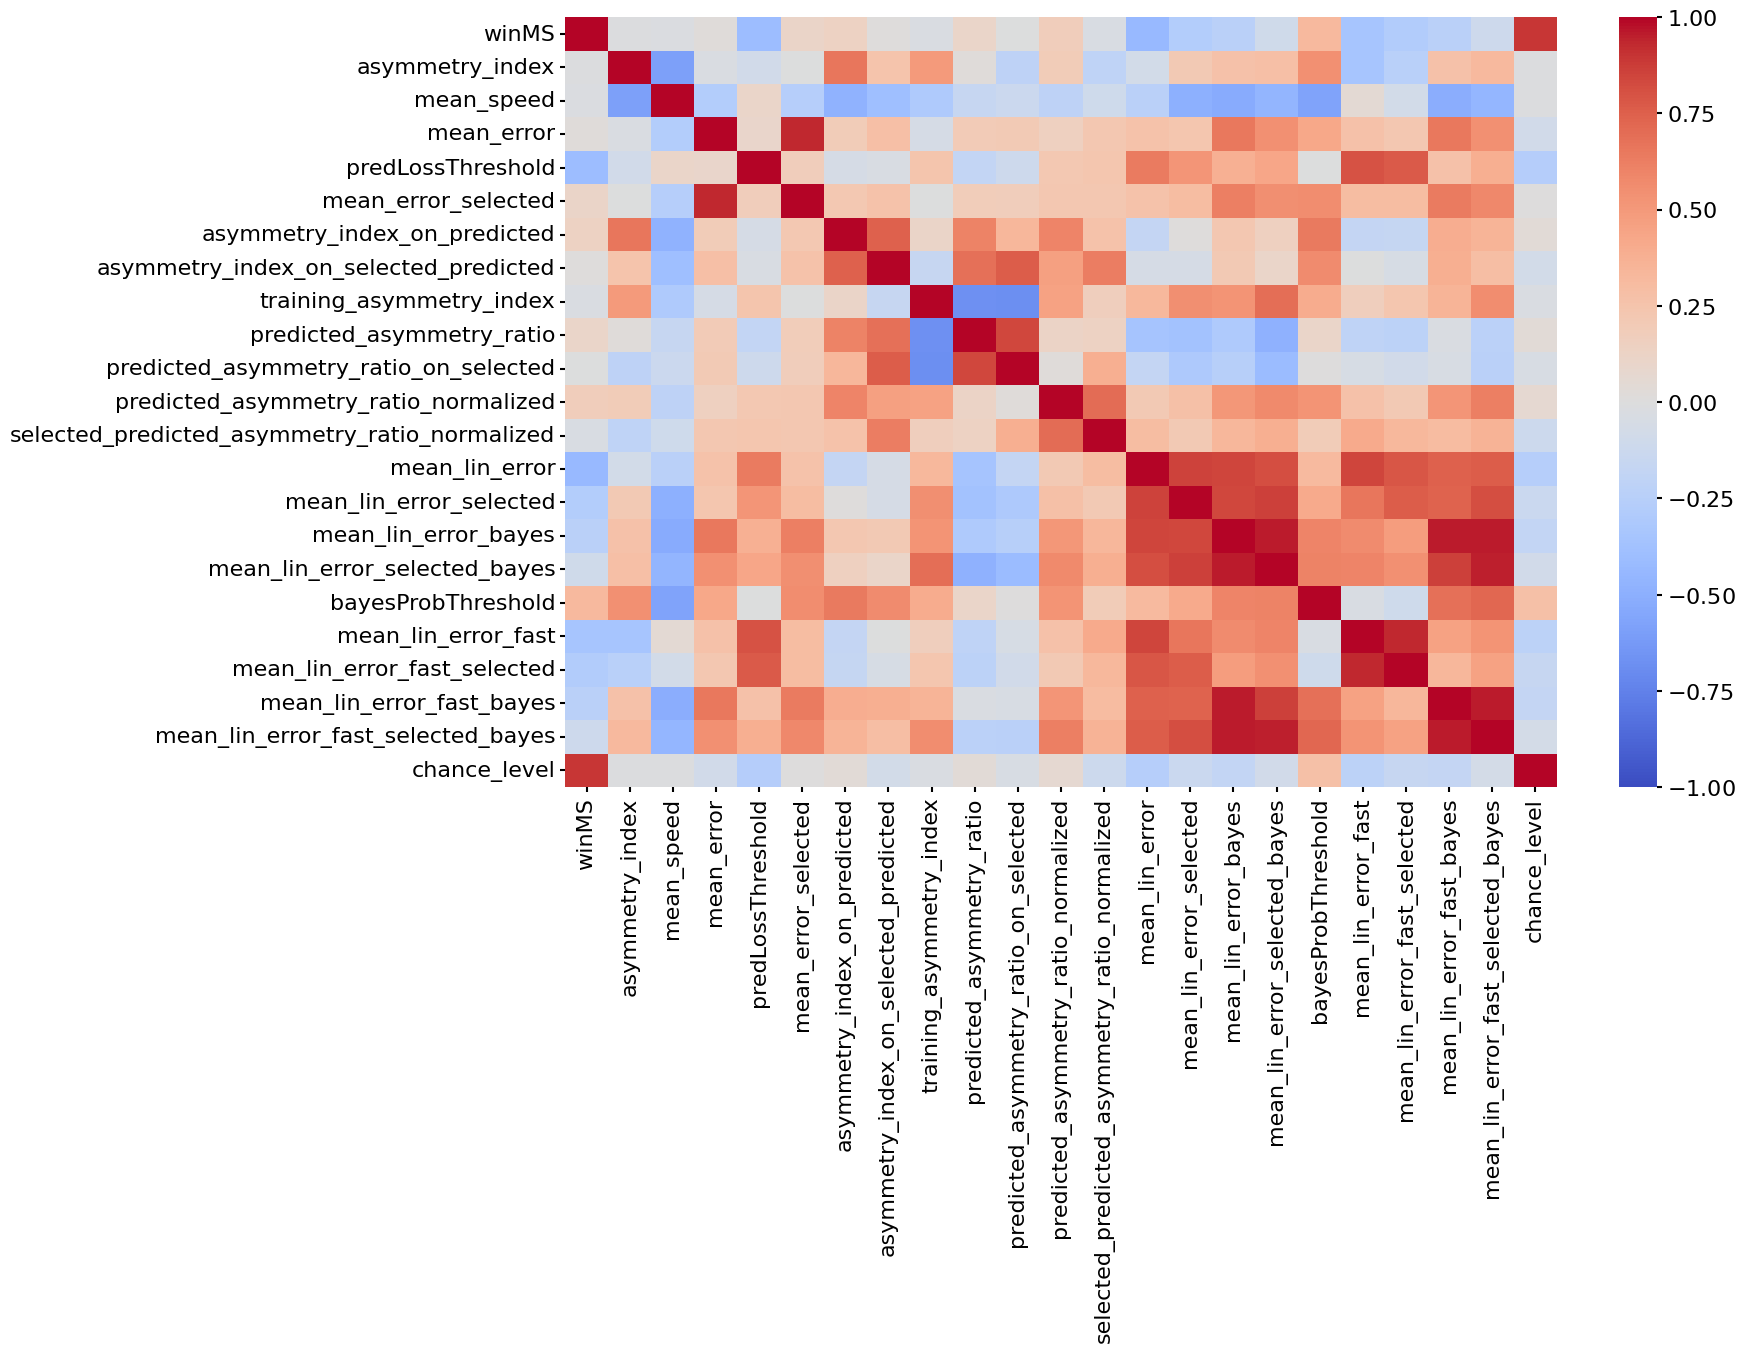

In [380]:
from matplotlib.colors import Normalize

corr = (
    loader_all.results_df.query("phase == 'pre'")
    .drop(columns="real_asymmetry_ratio")
    .corr(numeric_only=True)
)
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap="coolwarm",
    norm=Normalize(vmin=-1, vmax=1),
)
plt.savefig(os.path.join(main_dir, "correlation_matrix_all_pre.png"), dpi=300)

In [381]:
from pathlib import Path

loader_all.save(
    path=os.path.join(
        Path.home(),
        "Documents",
        "Theotime",
        "DimaERC2",
        "neuroencoders_1021",
        "_work",
        "STRIDE1_2_and_4_GaussianHeatmap_results_all_CSI_22092025.pickle",
    )
)

# end for today - let's sleep

In [61]:
loader_all.results_df.query(
    "ann_mode == 'Transformer' & phase != 'cond'"
).mouse.unique()

array(['M1162MFB', 'M1199PAG', 'M1230Known', 'M1230Novel', 'M1239MFB',
       'M994PAG'], dtype=object)

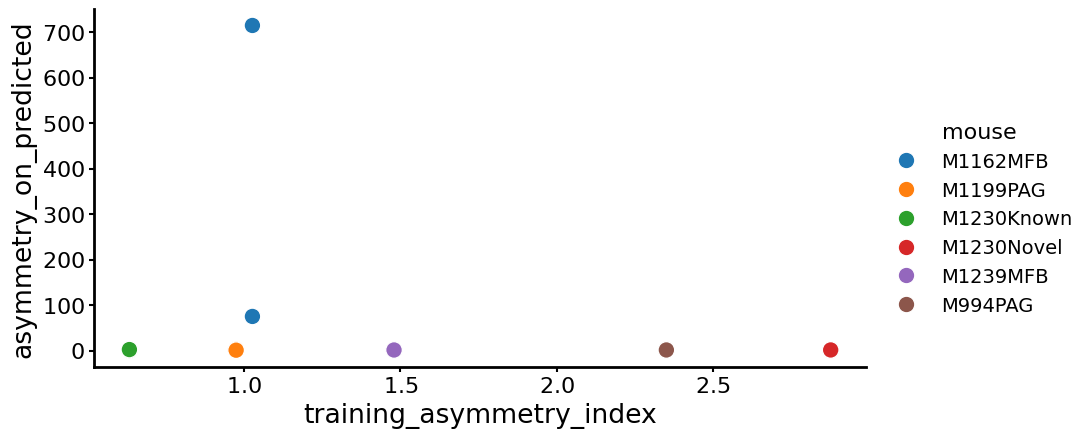

In [64]:
# plot a correlation plot between asymmetry_inded and mean_error, lin_error. hue by ann_mode and phase
sns.pairplot(
    loader_all.results_df.query("ann_mode == 'Transformer' & phase == 'pre'"),
    x_vars=["training_asymmetry_index"],
    y_vars=["asymmetry_on_predicted"],
    hue="mouse",
    height=4.5,
    aspect=2,
)

In [74]:
loader_all.results_df.query("ann_mode == 'Transformer' & phase == 'pre'")[
    ["mouse", "winMS"]
].apply(tuple, axis=1)

2       (M1162MFB, 108)
3       (M1162MFB, 252)
8       (M1199PAG, 108)
9       (M1199PAG, 252)
14    (M1230Known, 108)
15    (M1230Known, 252)
20    (M1230Novel, 108)
21    (M1230Novel, 252)
26      (M1239MFB, 108)
27      (M1239MFB, 252)
32       (M994PAG, 108)
33       (M994PAG, 252)
dtype: object

In [102]:
loader_all.results_df.asymmetry_bias

36    14.574086
37     4.604777
38    21.738744
39     6.677285
40    14.574086
        ...    
31     0.221105
32     0.913019
33     0.566472
34     1.026420
35     0.607129
Name: asymmetry_bias, Length: 72, dtype: float64

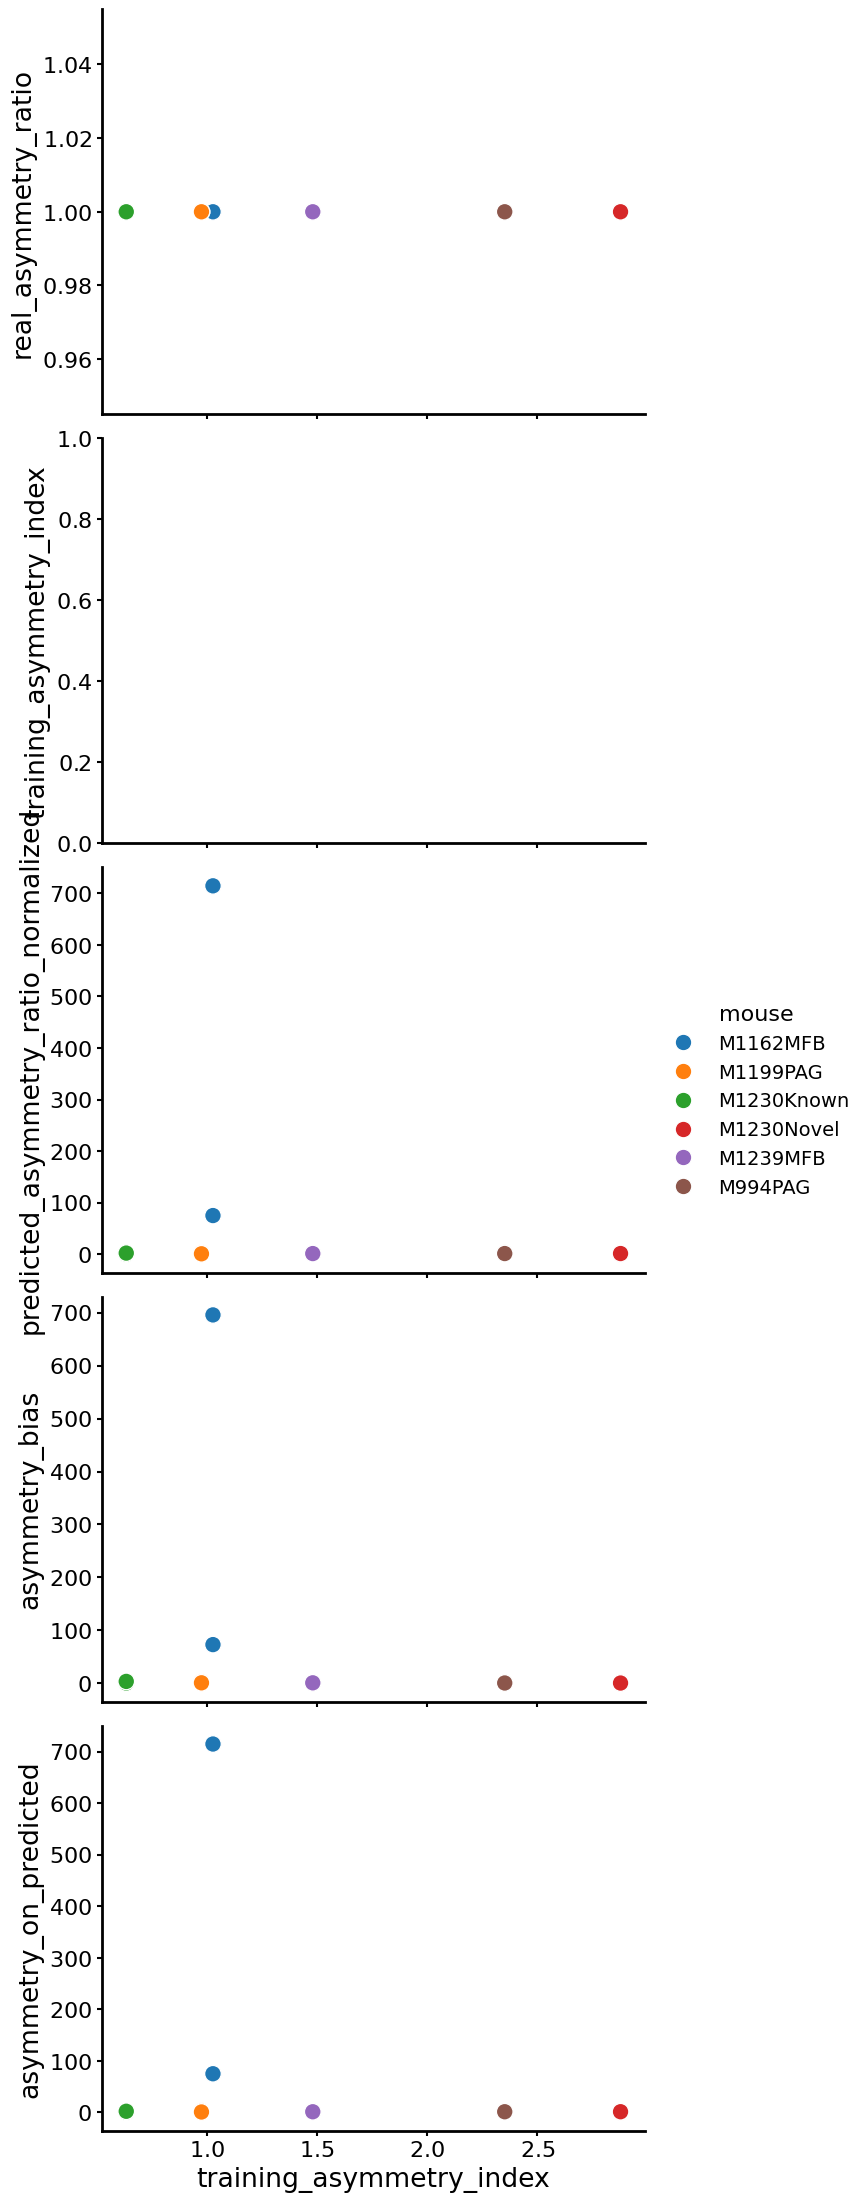

In [97]:
sns.pairplot(
    loader_all.results_df.query("ann_mode == 'Transformer' & phase == 'pre'")[
        [
            "mouse",
            "real_asymmetry_ratio",
            "training_asymmetry_index",
            "predicted_asymmetry_ratio_normalized",
            "asymmetry_bias",
            "asymmetry_on_predicted",
        ]
    ],
    x_vars=["training_asymmetry_index"],
    hue="mouse",
    height=4.5,
    aspect=1.5,
)

In [87]:
sns.pairplot(
    loader_all.results_df.query("ann_mode == 'Transformer' & phase == 'pre'")[
        loader_all.results_df.columns[
            loader_all.results_df.columns.str.contains("asymmetry|error|mouse")
        ]
    ],
    hue="mouse",
    height=4.5,
    aspect=1.5,
)

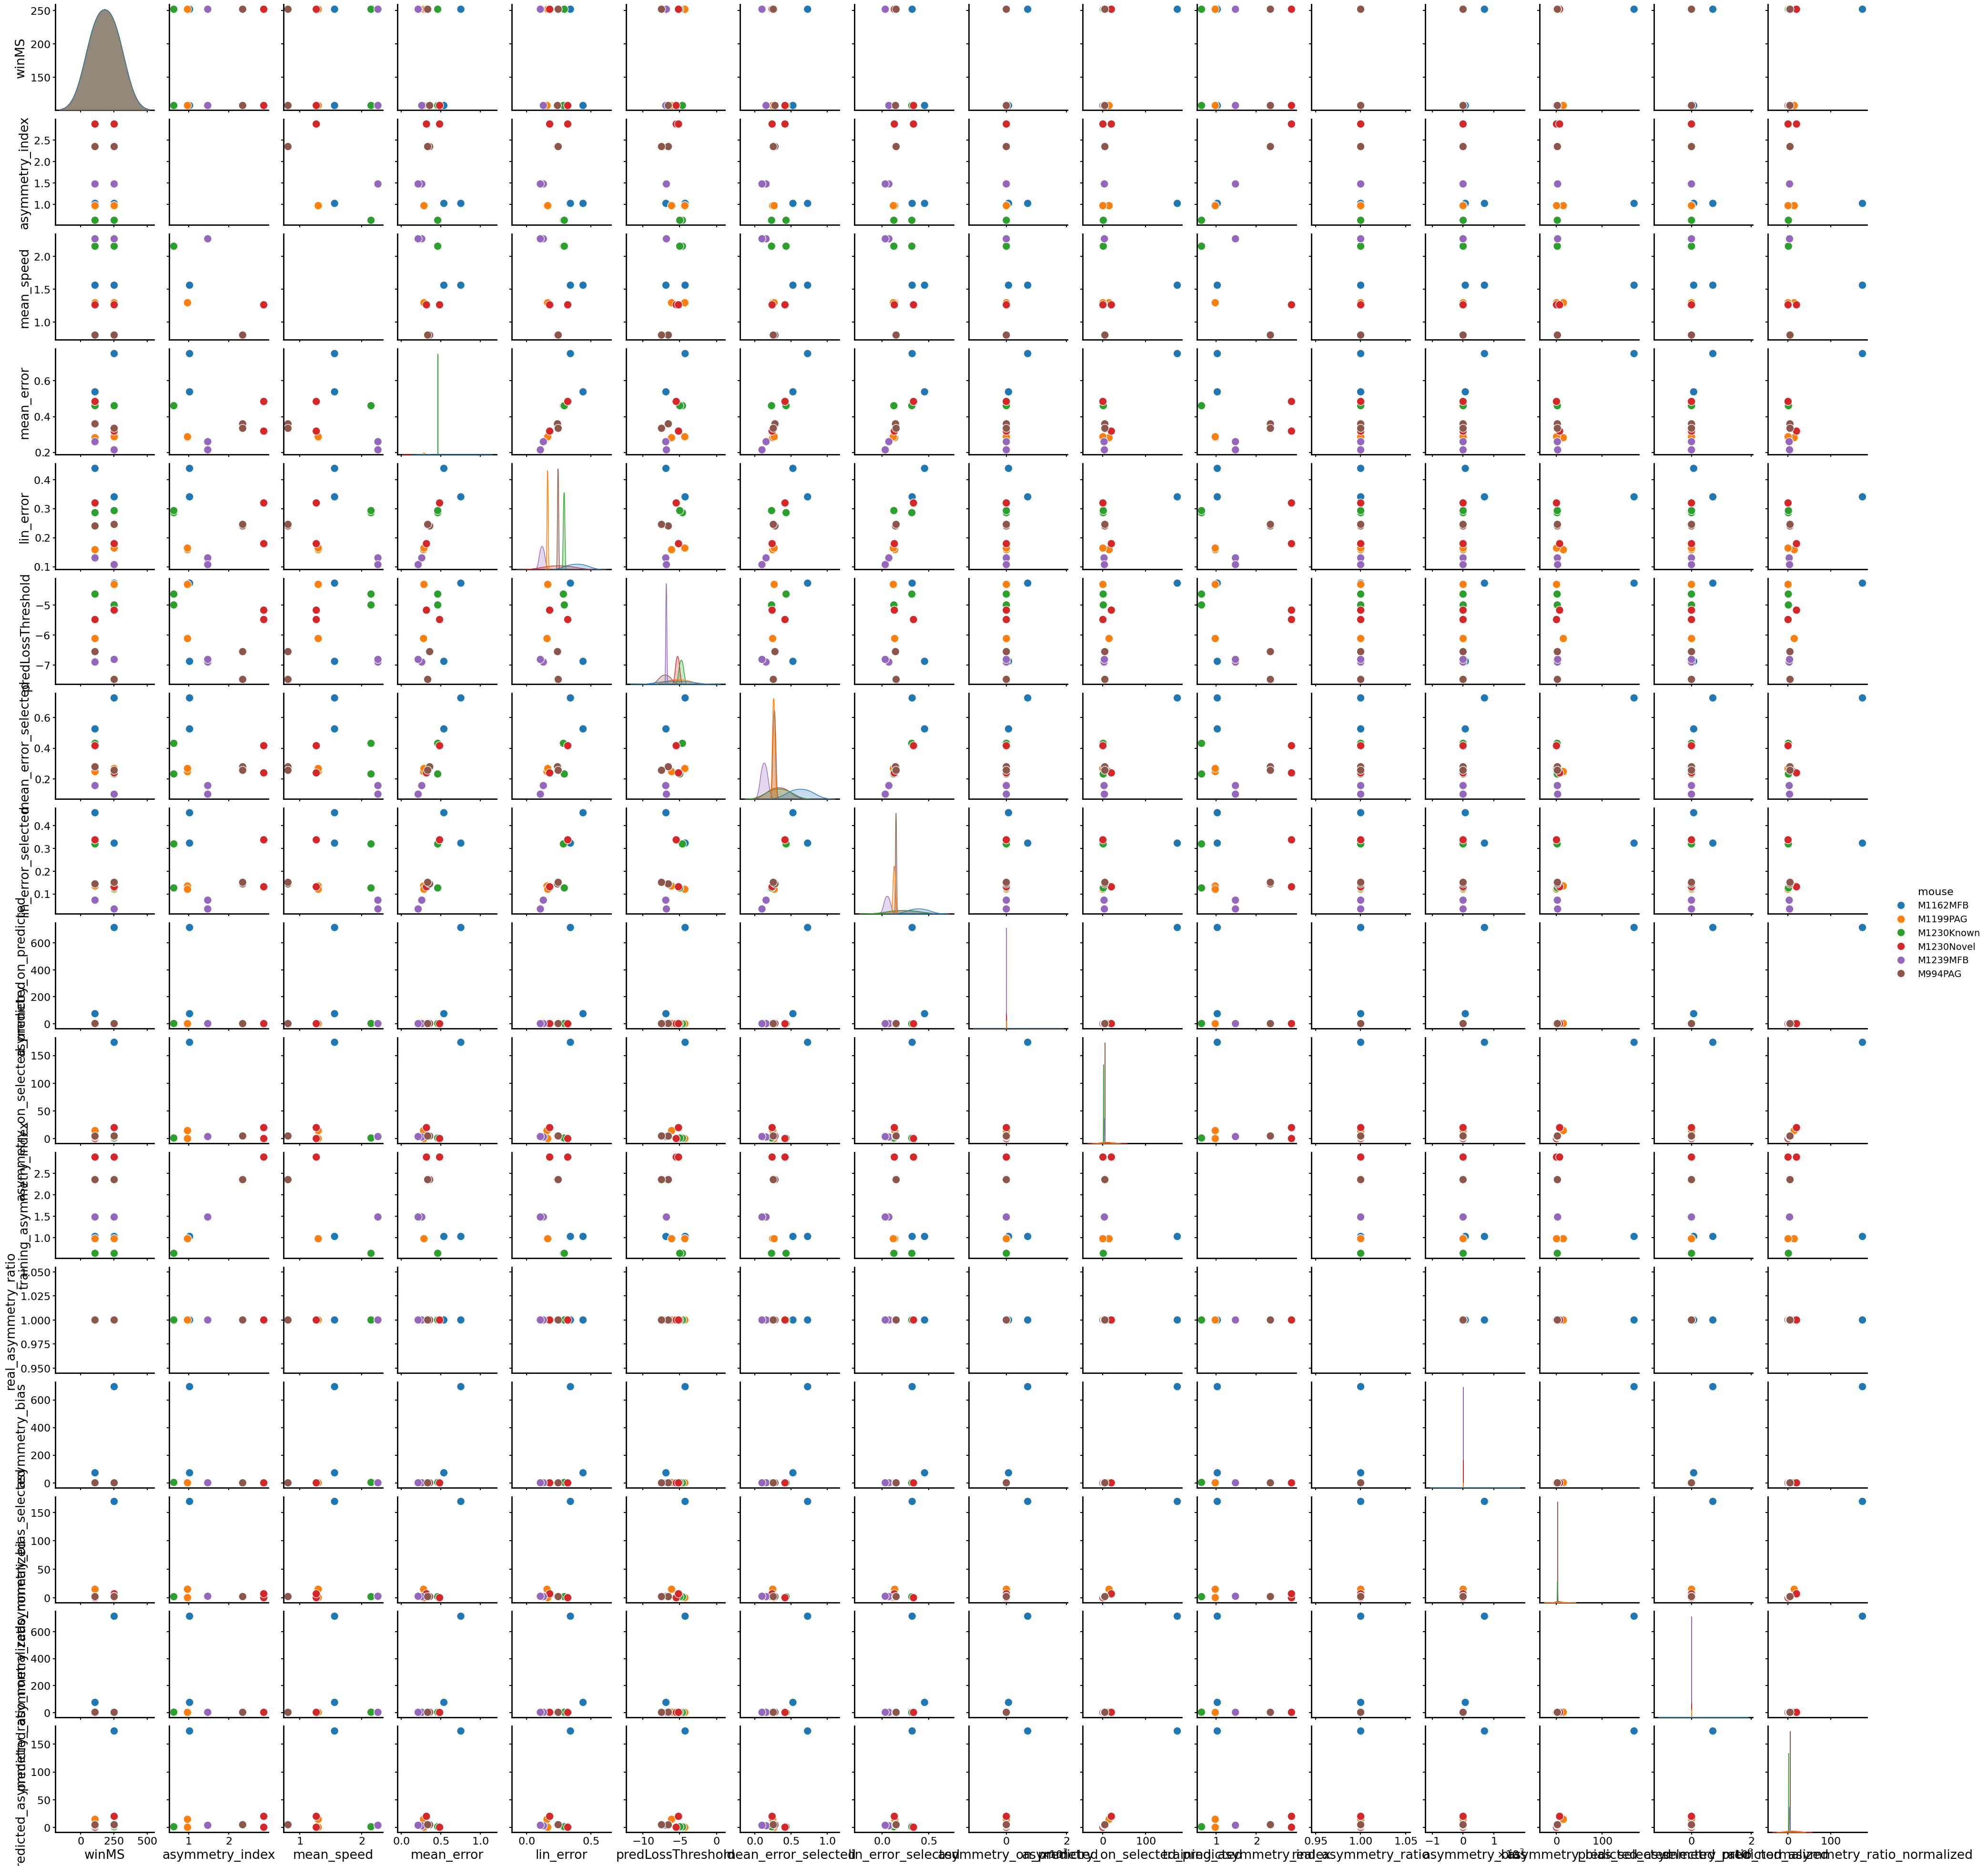

In [75]:
sns.pairplot(
    loader_all.results_df.query("ann_mode == 'Transformer' & phase == 'pre'"),
    hue="mouse",
)

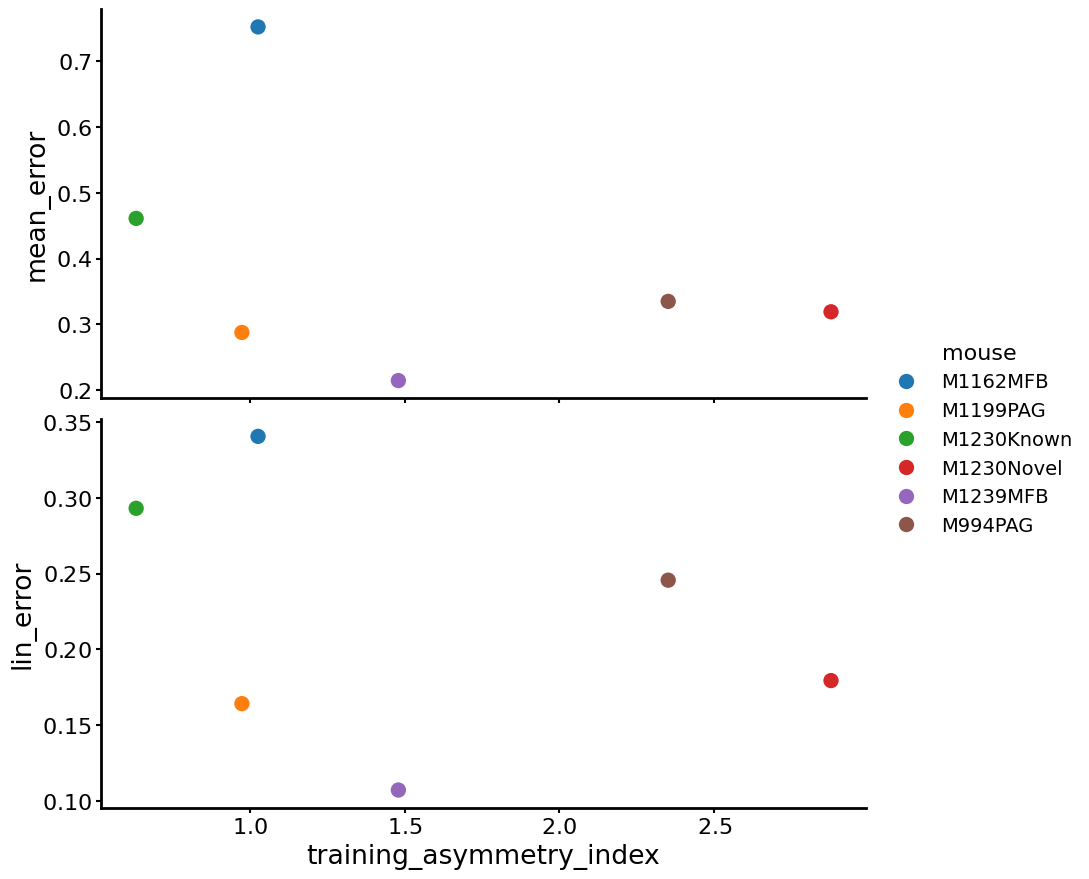

In [79]:
# plot a correlation plot between asymmetry_inded and mean_error, lin_error. hue by ann_mode and phase
from turtle import title


sns.pairplot(
    loader_all.results_df.query(
        "ann_mode == 'Transformer' & phase == 'pre' & winMS == 252"
    ),
    x_vars=["training_asymmetry_index"],
    y_vars=["mean_error", "lin_error"],
    hue="mouse",
    height=4.5,
    aspect=2,
)

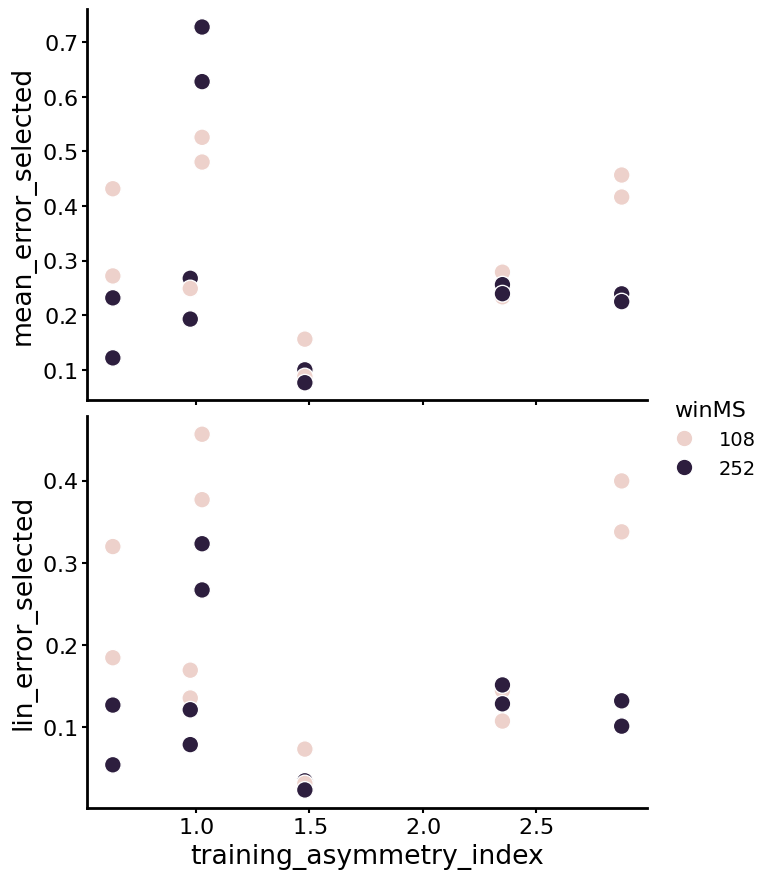

In [81]:
# plot a correlation plot between asymmetry_inded and mean_error, lin_error. hue by ann_mode and phase.
sns.pairplot(
    loader_all.results_df[
        (loader_all.results_df.ann_mode == "Transformer")
        & (loader_all.results_df.phase != "cond")
    ],
    x_vars=["training_asymmetry_index"],
    y_vars=["mean_error_selected", "lin_error_selected"],
    hue="winMS",
    height=4.5,
    aspect=1.5,
)

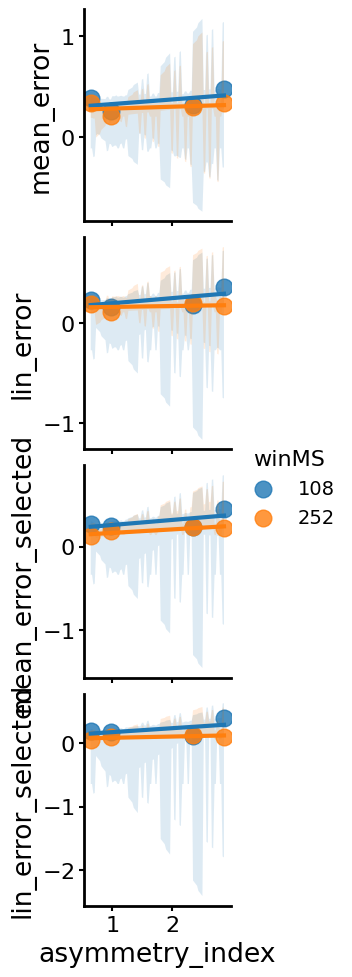

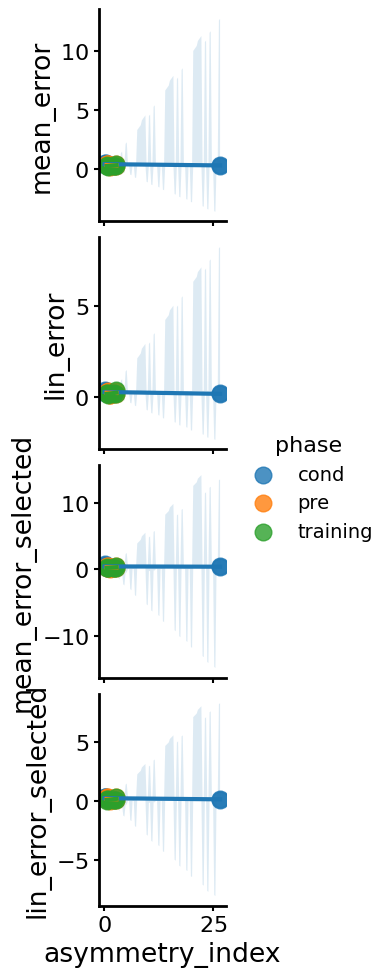

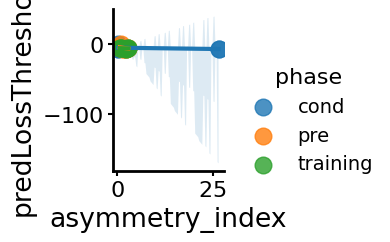

In [285]:
import seaborn as sns

# plot a correlation plot between asymmetry_inded and mean_error, lin_error. hue by ann_mode and phase.
sns.pairplot(
    df[(df.ann_mode == "Transformer") & (df.phase == "training")],
    x_vars=["asymmetry_index"],
    y_vars=["mean_error", "lin_error", "mean_error_selected", "lin_error_selected"],
    hue="winMS",
    kind="reg",
    diag_kind="kde",
)
sns.pairplot(
    df[(df.ann_mode == "Transformer")],
    x_vars=["asymmetry_index"],
    y_vars=["mean_error", "lin_error", "mean_error_selected", "lin_error_selected"],
    hue="phase",
    kind="reg",
    diag_kind="kde",
)
sns.pairplot(
    df[(df.ann_mode == "Transformer")],
    x_vars=["asymmetry_index"],
    y_vars=["predLossThreshold"],
    hue="phase",
    kind="reg",
    diag_kind="kde",
)

In [ ]:
from importData.gui_elements import AnimatedPositionPlotter

In [ ]:
%matplotlib qt

In [ ]:
plt.close("all")

In [ ]:
results_dict["Transformer"]["1199PAG"]["pre"].render_frame_static(
    frame=40,
    pair_points=True,
    l_function=Mouse_Results.l_function,
    linear_position_mode=True,
    alpha_delta_line=0.75,
    blit=True,
)

In [ ]:
results_dict["Transformer"]["1199PAG"]["pre"].save_video_frame_with_pool(
    output_dir="/home/mickey/download/bonjourPool",
    pair_points=True,
    interval=70,
    l_function=Mouse_Results.l_function,
    linear_position_mode=True,
    alpha_delta_line=0.75,
    blit=True,
)

results_dict["Transformer"]["1199PAG"]["pre"].save_video_frame_with_joblib(
    output_dir="/home/mickey/download/bonjourLib",
    pair_points=True,
    interval=70,
    l_function=Mouse_Results.l_function,
    linear_position_mode=True,
    alpha_delta_line=0.75,
    blit=True,
)

In [ ]:
results_dict["Transformer"]["1199PAG"]["pre"].show_movie(
    blit=True,
    pair_points=True,
    interval=200,
    l_function=Mouse_Results.l_function,
    linear_position_mode=True,
    alpha_delta_line=0.75,
    be_fast=False,
)

In [ ]:
for ann_mode, dir, name_exp in zip(
    ["Transformer", "LSTM"],
    [Dir_Transformer, Dir_LSTM],
    [nameExp_Transformer, nameExp_LSTM],
):
    for mouse, manipe in zip(mice_names, mice_manipes):
        for suffix, phase in zip(
            ["_pre", "_training", "_cond"], ["pre", "training", "cond"]
        ):
            skip_to_next_suffix = False
            print(f"Processing mouse {mouse} with manip {manipe}")
            try:
                Mouse_Results = results_dict[ann_mode][mouse + manipe][phase]
            except KeyError:
                print(
                    f"KeyError for mouse {mouse} with manipulation {manipe} in phase {phase}"
                )
                skip_to_next_suffix = True
                continue

            if skip_to_next_suffix:
                continue
            # results_dict[ann_mode][mouse].error_matrix_linerrors_by_speed(suffixes = ["_pre", "_training", "_cond"])
            # Mouse_Results.predLoss_linError()

            for i, winms in enumerate(Mouse_Results.windows):
                skip_to_next_win = False
                idx = Mouse_Results.windows.index(winms)
                win_value = Mouse_Results.windows_values[idx]
                try:
                    quantile_predLoss = np.quantile(
                        Mouse_Results.resultsNN_phase[suffix]["predLoss"][idx], 0.3
                    )
                    selection = (
                        Mouse_Results.resultsNN_phase[suffix]["predLoss"][idx]
                        < quantile_predLoss
                    )
                except KeyError:
                    print(
                        f"KeyError for quantile_predLoss in mouse {mouse}, manipulation {manipe}, phase {phase}"
                    )
                    skip_to_next_win = True
                    continue

                if skip_to_next_win:
                    continue

                plotter_vanilla = AnimatedPositionPlotter(
                    Mouse_Results.data_helper[winms],
                    positions=Mouse_Results.resultsNN_phase[suffix]["truePos"][idx],
                    predicted=Mouse_Results.resultsNN_phase[suffix]["fullPred"][idx],
                    windowSizeMS=win_value,
                    fps=30,
                    target=target,
                    mouse_name=mouse,
                    manipe=manipe,
                    nameExp=name_exp,
                    interval=70,
                    pair_points=True,
                    l_function=Mouse_Results.l_function,
                    linear_position_mode=True,
                    blit=True,
                    setup_plot=True,
                    block=False,
                )

                plotter_vanilla.show()
                plotter = AnimatedPositionPlotter(
                    Mouse_Results.data_helper[winms],
                    positions=Mouse_Results.resultsNN_phase[suffix]["truePos"][idx],
                    predicted=Mouse_Results.resultsNN_phase[suffix]["fullPred"][idx],
                    predLossMask=selection,
                    windowSizeMS=win_value,
                    fps=30,
                    target=target,
                    mouse_name=mouse,
                    manipe=manipe,
                    nameExp=name_exp,
                    interval=70,
                    pair_points=True,
                    l_function=Mouse_Results.l_function,
                    linear_position_mode=True,
                    blit=True,
                    setup_plot=True,
                    block=False,
                )

                if not os.path.exists(os.path.join(main_dir, ann_mode, mouse + manipe)):
                    print(f"Creating directory: {os.path.join(main_dir, ann_mode)}")
                    os.mkdir(os.path.join(main_dir, ann_mode))
                if not os.path.exists(os.path.join(main_dir, ann_mode, mouse + manipe)):
                    print(
                        f"Creating directory: {os.path.join(main_dir, ann_mode, mouse + manipe)}"
                    )
                    os.mkdir(os.path.join(main_dir, ann_mode, mouse + manipe))

                if not os.path.exists(
                    os.path.join(
                        main_dir,
                        ann_mode,
                        mouse + manipe,
                        f"{mouse}_{manipe}_phase_{phase}_win_{win_value}.mp4",
                    )
                ):
                    try:
                        animation_tmp_vanilla = plotter_vanilla.create_animation(
                            repeat=False,
                            save_path=os.path.join(
                                main_dir,
                                ann_mode,
                                mouse + manipe,
                                f"{mouse}_{manipe}_phase_{phase}_win_{win_value}.mp4",
                            ),
                        )
                    except KeyError:
                        continue

                if not os.path.exists(
                    os.path.join(
                        main_dir,
                        ann_mode,
                        mouse + manipe,
                        f"filtered_{mouse}_{manipe}_phase_{phase}_win_{win_value}.mp4",
                    )
                ):
                    print(
                        f"Creating animation for filtered data: {mouse}_{manipe}_phase_{phase}"
                    )
                    try:
                        animation_tmp = plotter.create_animation(
                            repeat=False,
                            save_path=os.path.join(
                                main_dir,
                                ann_mode,
                                mouse + manipe,
                                f"filtered_{mouse}_{manipe}_phase_{phase}_win_{win_value}.mp4",
                            ),
                        )
                    except KeyError:
                        print(
                            f"KeyError for filtered animation: {mouse}_{manipe}_win_{win_value}_phase_{phase}"
                        )
                        continue

print("All animations created successfully.")

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.load_results(force=True)

In [ ]:
Mouse_Results.load_results(force=True, phase="training", which="bayes")

In [ ]:
Mouse_Results.load_results(force=True, phase="cond")

In [ ]:
Mouse_Results.data_helper["108"].phase

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.resultsNN.keys()

In [ ]:
inferring = Mouse_Results.resultsNN["fullPred"][1]
linferring = Mouse_Results.resultsNN["linPred"][0]
pos = Mouse_Results.resultsNN["truePos"][1]
lpos = Mouse_Results.resultsNN["linTruePos"][0]

error = np.array(
    [np.linalg.norm(inferring[i, :] - pos[i, :]) for i in range(inferring.shape[0])]
)  # eucledian distance

In [ ]:
error_mask = error > 0.6

In [ ]:
linferring.min()

In [ ]:
plt.hist2d(
    lpos,
    linferring,
    cmap="viridis",
    bins=[np.linspace(0, 1, 50), np.linspace(0, 1, 50)],
)

In [ ]:
plt.hist2d(inferring[error_mask, 0], inferring[error_mask, 1], cmap="viridis")
plt.colorbar()

In [ ]:
np.where(
    np.linalg.norm(
        [Mouse_Results.resultsNN["fullPred"][0], Mouse_Results.resultsNN["truePos"][0]]
    )
    > 0
)[0]

In [ ]:
Mouse_Results.resultsNN.keys()

In [ ]:
Mouse_Results.show_results(phase="training", save=True)

In [ ]:
from importData.gui_elements import AnimatedPositionPlotter

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.resultsNN

In [ ]:
plotter = AnimatedPositionPlotter(
    Mouse_Results.data_helper["108"],
    positions=Mouse_Results.resultsNN["truePos"][0],
    predicted=Mouse_Results.resultsNN["fullPred"][0],
    speedMaskArray=Mouse_Results.resultsNN["speedMask"][0],
    windowSizeMS=108,
    fps=30,
    target=target,
    mouse_name=mouse,
    manipe=manipe,
    nameExp=nameExp,
)

anim = plotter.show(interval=10, repeat=True, block=True, with_ref_bg=False)

In [ ]:
Mouse_Results.data_helper["108"]

In [ ]:
Mouse_Results.ann["108"].fix_linearizer(
    Mouse_Results.Linearizer.mazePoints, Mouse_Results.Linearizer.tsProj
)

In [ ]:
Mouse_Results.ann["108"].setup_dynamic_dense_loss(
    Mouse_Results.data_helper["108"].fullBehavior, alpha=1
)

In [ ]:
%matplotlib qt

In [ ]:
print_results.print_results(
    Mouse_Results.ann["108"].folderResult,
    windowSizeMS=108,
    show=True,
    lossSelection=0.1,
    euclidean=False,
    target="pos",
    phase=None,
    training_data=Mouse_Results.ann["108"].training_data,
    save=False,
    l_function=Mouse_Results.l_function,
)

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results

In [ ]:
%matplotlib inline

In [ ]:
%matplotlib qt

In [ ]:
from importData.epochs_management import inEpochsMask

trainMask = inEpochsMask(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][:, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Times"]["trainEpochs"],
)
testMask = inEpochsMask(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][:, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Times"]["testEpochs"],
)
speedMask = Mouse_Results.data_helper["108"].fullBehavior["Times"]["speedFilter"]

mask = (trainMask | testMask) * speedMask

In [ ]:
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][:, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][:, 0],
    "o",
    markersize=1,
    alpha=0.5,
    c="r",
)
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][trainMask, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][trainMask, 0],
    "o",
    markersize=1,
    alpha=1,
)
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][trainMask, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][trainMask, 1],
    "o",
    markersize=1,
    alpha=1,
)

In [ ]:
training_data = Mouse_Results.data_helper["108"].fullBehavior["Positions"][mask]
training_data.shape

In [ ]:
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][:, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][:, 0],
    "o",
    markersize=1,
    alpha=0.3,
    c="r",
)
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][mask, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][mask, 0],
    "o",
    markersize=1,
    alpha=1,
)
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][mask, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][mask, 1],
    "o",
    markersize=1,
    alpha=1,
)

In [ ]:
Mouse_Results.show_results(
    save=False,
    winMS=108,
    phase="training",
    training_data=training_data,
    lossSelection=0.1,
    l_function=Mouse_Results.l_function,
)

In [ ]:
Mouse_Results.load_data(suffix="_pre")

In [ ]:
Mouse_Results.resultsNN

In [ ]:
Mouse_Results.test_bayes()

In [ ]:
Mouse_Results.fig_example_XY(108)

In [ ]:
Mouse_Results.fig_example_linear_filtered(fprop=0.1)

In [ ]:
Mouse_Results.compare_nn_bayes(108, isShow=True)

In [ ]:
Mouse_Results.mean_euclerrors()

In [ ]:
Mouse_Results.predLoss_vs_trueLoss()

In [ ]:
Mouse_Results.nnVSbayes()

In [ ]:
Mouse_Results.mean_linerrors()

In [ ]:
Mouse_Results.predLoss_linError(speed="slow", step=1e-6)

In [ ]:
Mouse_Results.predLoss_euclError(step=1e-6, scaled=False)

In [ ]:
Mouse_Results.fig_example_2d(speed="fast")

In [ ]:
Mouse_Results.hist_linerrors(speed="fast")

In [ ]:
Mouse_Results.Params.phase

In [ ]:
Mouse_Results.run_spike_alignment(useTrain=False)

In [ ]:
Mouse_Results.plot_pc_tuning_curve_and_predictions(ws=108)

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.DataHelper.fullBehavior["positionTime"]

In [ ]:
Mouse_Results.load_results(force=True, phase="pre")

In [ ]:
from importData.epochs_management import inEpochs


fig, ax = plt.subplots()

ax1 = plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)

trainMask = inEpochs(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"],
    Mouse_Results.data_helper["108"].fullBehavior["Times"]["trainEpochs"],
)[0]
testMask = inEpochs(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"],
    Mouse_Results.data_helper["108"].fullBehavior["Times"]["testEpochs"],
)[0]

ax1.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][trainMask],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][trainMask, 0],
    "--.",
    color="black",
    label="training",
    markersize=6,
)
ax1.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][testMask],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][testMask, 0],
    "--.",
    color="red",
    label="testing",
    markersize=6,
)

ax2.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][trainMask],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][trainMask, 1],
    "--.",
    color="black",
    label="training",
    markersize=6,
)
ax2.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][testMask],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][testMask, 1],
    "--.",
    color="red",
    label="testing",
    markersize=6,
)

In [ ]:
print_results.print_results(
    Mouse_Results.folderResult, show=True, windowSizeMS=108, phase=phase, target=target
)

In [ ]:
Mouse_Results.data_helper["108"].fullBehavior["Times"]["SessionEpochs"]["pre"]

In [ ]:
plt.plot(np.arange(0, 1000, 1), np.random.rand(1000), label="test")

In [ ]:
plt.plot(testEpochs[0])
plt.show()

In [ ]:
from importData.epochs_management import inEpochs

testEpochs = inEpochs(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"].flatten(),
    Mouse_Results.data_helper["108"].fullBehavior["Times"]["testEpochs"],
)[0]
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][testEpochs, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][testEpochs, 1],
)
plt.show()

In [ ]:
Mouse_Results.projects["108"]

In [ ]:
print(Mouse_Results.projects["108"])

In [ ]:
Mouse_Results.load_trainers()

In [ ]:
Mouse_Results.load_results(force=True)

In [ ]:
%matplotlib inline

In [ ]:
NNTrainer = Training.LSTMandSpikeNetwork(
    ProjectPath,
    Parameters[winMS],
    deviceName=deviceName,
    debug=False,
    phase=phase,
)

In [ ]:
DataHelper.resultsPath

In [ ]:
featurePred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"featurePred_{phase}.csv")
).to_numpy()
featureTrue = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"featureTrue_{phase}.csv")
).to_numpy()
lossPred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"lossPred_{phase}.csv")
).to_numpy()
speedMask = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"speedMask_{phase}.csv")
).to_numpy()

linearPred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"linearPred_{phase}.csv")
).to_numpy()
linearTrue = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"linearTrue_{phase}.csv")
).to_numpy()

In [ ]:
featurePred = featurePred[:, -2]
featureTrue = featureTrue[:, -2]
lossPred = lossPred[:, -1]
speedMask = speedMask[:, -1]

In [ ]:
DataHelper.fullBehavior["Times"]["testEpochs"]

In [ ]:
from importData.epochs_management import inEpochs, inEpochsMask

timeStepPred = DataHelper.fullBehavior["positionTime"][
    inEpochs(
        DataHelper.fullBehavior["positionTime"][:, 0],
        DataHelper.fullBehavior["Times"]["testEpochs"],
    )
]

NameError: name 'DataHelper' is not defined

In [ ]:
timeStepPred

In [ ]:
plt.plot(featureTrue)

In [ ]:
qControltmp = lossPred.copy()
temp = lossPred.argsort(axis=0)

In [ ]:
thresh = np.squeeze(qControltmp[temp[int(len(temp) * 0.5)]])

In [ ]:
np.quantile(lossPred, 0.5)

In [ ]:
selection = np.squeeze(qControltmp < thresh)

In [ ]:
inferring = featurePred
pos = featureTrue

In [ ]:
selection

In [ ]:
temp

In [ ]:
%matplotlib inline

In [ ]:
lossPred

In [ ]:
plt.hist(featureTrue, label="True Feature")
plt.hist(featurePred, label="Predicted Feature")
plt.legend()

In [ ]:
for quantile in [0.1, 0.2, 0.3, 0.4, 0.5]:
    qControl = np.quantile(lossPred, quantile)
    plt.figure()
    plt.title(f"Quantile {quantile}")
    plt.plot(
        featurePred[lossPred <= qControl],
        np.abs(featureTrue[lossPred <= qControl] - featurePred[lossPred <= qControl]),
        "k.",
    )
    mean_error = np.mean(
        np.abs(featureTrue[lossPred <= qControl] - featurePred[lossPred <= qControl])
    )
    plt.axhline(
        mean_error, color="r", linestyle="--", label=f"Mean Error: {mean_error:.2f}"
    )
    plt.xlabel("Predicted Feature")

In [ ]:
DataHelper.globalResultsPath

In [ ]:
reload(print_results)
print_results.print_results(
    NNTrainer.folderResult,
    windowSizeMS=108,
    lossSelection=0.5,
    target="pos",
    phase=phase,
)

## waveform comparator

In [ ]:
from importData.compareSpikeFiltering import WaveFormComparator

In [ ]:
Mouse_Results.run_spike_alignment(force=True)

In [ ]:
waveform = WaveFormComparator(
    Mouse_Results.Project,
    Mouse_Results.Params,
    Mouse_Results.DataHelper.fullBehavior,
    windowSizeMS=Mouse_Results.windowSizeMS,
    useTrain=True,
)

In [ ]:
waveform.save_alignment_tools(
    Mouse_Results.bayes,
    Mouse_Results.l_function,
    windowSizeMS=Mouse_Results.windowSizeMS,
)

## temp

In [ ]:
projectPath = Project(
    os.path.join(
        Dir[
            (Dir["name"].str.contains(mouse)) & (Dir["manipe"].str.contains(manipe))
        ].path.values[0],
        "amplifier.xml",
    ),
    nameExp=nameExp,
    windowSize=0.108,
)

In [ ]:
projectPath.experimentPath

In [ ]:
windowSizeMS

In [ ]:
DataHelper = DataHelperClass(
    projectPath.xml,
    windowSize=0.108,
    mode=mode,
    target=target,
    phase=phase,
    nameExp=nameExp,
)

In [ ]:
DataHelper.folderResult

In [ ]:
Linearizer = UMazeLinearizer(projectPath.folder, phase=phase)

In [ ]:
%matplotlib qt

In [ ]:
Linearizer.verify_linearization(
    DataHelper.positions / DataHelper.maxPos(), projectPath.folder, overwrite=False
)

In [ ]:
l_function = Linearizer.pykeops_linearization

In [ ]:
DataHelper.get_true_target(l_function, in_place=True, show=True)

In [ ]:
windowSizeMS

In [ ]:
Parameters = Params(
    helper=DataHelper,
    windowSize=0.108,
    nEpochs=nEpochs,
    phase=phase,
    batchSize=256,
    save_json=True,
)

In [ ]:
Parameters.folderResult

In [ ]:
Parameters.resultsPath

In [ ]:
save_project_to_pickle(projectPath)

In [ ]:
save_project_to_pickle(
    Parameters, output=os.path.join(Parameters.resultsPath, "Parameters.pkl")
)